# <a id='toc1_'></a>[Data Explorations](#toc0_)

Here we are looking at taking our sample of the amazon reviews dataset and exploring it. We divide the section into two parts. 

1. A quick overview of the data - shape, size, features etc.
2. A more detailed look at the data - distributions, correlations etc.


We have our dataset `amz_rev_cleaned.csv` which shall be loaded and used.

**Table of contents**<a id='toc0_'></a>    
- [Data Loading and Setup](#toc2_)    
- [Summary of the Data](#toc3_)    
- [Missing Data Visualised](#toc4_)    
- [Distribution Plots](#toc5_)    
  - [Ratings](#toc5_1_)    
  - [Categories](#toc5_2_)    
- [Reviewers](#toc6_)    
    - [Top 10 Reviewers by Number of Reviews](#toc6_1_1_)    
    - [Distribution of Number of Reviews](#toc6_1_2_)    
    - [Average Rating against Number of Reviews per Reviewer](#toc6_1_3_)    
    - [Top 10 Reviewers by Average Length of Reviews](#toc6_1_4_)    
    - [Top 10 Reviewers by Average Rating (with at least 50 reviews)](#toc6_1_5_)    
- [Products](#toc7_)    
    - [Top 10 Products by Number of Reviews](#toc7_1_1_)    
    - [Top 10 Products by Average Rating](#toc7_1_2_)    
    - [Product Average Rating vs Number of Reviews](#toc7_1_3_)    
    - [Number of Reviews per Product over Time](#toc7_1_4_)    
    - [Average Rating per Product over Time](#toc7_1_5_)    
- [Categories](#toc8_)    
    - [Categories by Average Rating](#toc8_1_1_)    
    - [Average Rating of Categories over Time](#toc8_1_2_)    
    - [Average Rating per Category over Time](#toc8_1_3_)    
- [Reviews and Review Text](#toc9_)    
    - [Review Length vs Rating](#toc9_1_1_)    
    - [Top 10 Reviews by Length](#toc9_1_2_)    
    - [Number of Reviews over Time](#toc9_1_3_)    
- [Brands](#toc10_)    
    - [Top 10 Brands by Number of Reviews](#toc10_1_1_)    
    - [Top 10 Brands by Average Rating](#toc10_1_2_)    
    - [Brand Average Rating vs Number of Reviews](#toc10_1_3_)    
    - [Average Rating of Brands over Time for Top 10 Brands](#toc10_1_4_)    
    - [Average Rating per Product over Time](#toc10_1_5_)    
- [Sentiment Analysis](#toc11_)    
  - [Sentiment per Review](#toc11_1_)    
    - [Most Positive Reviews](#toc11_1_1_)    
    - [Most Negative Reviews](#toc11_1_2_)    
    - [Most Positive Reviewers](#toc11_1_3_)    
    - [Most Negative Reviewers](#toc11_1_4_)    
    - [NRC Emotion Lexicon Analysis](#toc11_1_5_)    
  - [VADER Lexicon Analysis](#toc11_2_)    
    - [Reviews](#toc11_2_1_)    
    - [Products](#toc11_2_2_)    
    - [ Categories](#toc11_2_3_)    
    - [Brands](#toc11_2_4_)    
  - [Distribution of Sentiment Scores](#toc11_3_)    
  - [Sentiment per Product](#toc11_4_)    
    - [Most Positive Products](#toc11_4_1_)    
    - [Most Negative Products](#toc11_4_2_)    
  - [Sentiment per Category](#toc11_5_)    
    - [Most Positive Categories](#toc11_5_1_)    
    - [Most Negative Categories](#toc11_5_2_)    
  - [Sentiment per Brand](#toc11_6_)    
    - [Most Positive Brands](#toc11_6_1_)    
    - [Most Negative Brands](#toc11_6_2_)    
  - [Comparing Lexicons](#toc11_7_)    
- [Data Summaries](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Loading and Setup](#toc0_)

In [338]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pavansingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [339]:
# load full data
data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti.csv')

# load sample data
#data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti_sample.csv')

# <a id='toc3_'></a>[Summary of the Data](#toc0_)

In [340]:
# view the data 
display(data.head(4))

# shape of data
print("Shape of Data:", data.shape, '\n')

# columns in data
print("Columns in Data:", data.columns, '\n')

reviewerID     reviewerName  reviewTime        asin  \
0    A3WJELEV137U     John Bennett  2015-06-05  0001526863   
1  A3OJM6TXMK3J53           samson  2015-12-05  0005164885   
2  A14YR7QK3ASFFW  Amazon Customer  2001-04-24  0005465079   
3  A1VE933MFXTG18               sj  2016-02-21  0307142493   

                                               title  \
0  steve green hide em in your heart 13 bible mem...   
1                    christmas eve and other stories   
2                                           forgiven   
3                   santa claus is comin to town vhs   

                      brand  \
0               steve green   
1  trans siberian orchestra   
2             don francisco   
3              fred astaire   

                                         description  \
0  steve green hide em in your heart 13 bible mem...   
1  this is a concept album all the way with tales...   
2  1 jesus lord of the way i feel 2 jehoshaphat 3...   
3  this is the vhs movie santa claus is comin to ...   

                                          reviewText     category_x  overall  \
0  product worked as advertised and am pleased wi...  movies and tv      5.0   
1                     nice to hear this cd beautiful  cds and vinyl      5.0   
2  that one song has to be one of the best in ccm...  cds and vinyl      5.0   
3  i just love these older movies they really are...  movies and tv      5.0   

   ...                               filtered_tokens_desc  \
0  ...  ['steve', 'green', 'hide', 'em', 'heart', '13'...   
1  ...  ['concept', 'album', 'way', 'tales', 'christma...   
2  ...  ['1', 'jesus', 'lord', 'way', 'feel', '2', 'je...   
3  ...  ['vhs', 'movie', 'santa', 'claus', 'comin', 't...   

                            sentiments_vader_revText  \
0  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...   
1  {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...   
2  {'neg': 0.058, 'neu': 0.803, 'pos': 0.139, 'co...   
3  {'neg': 0.034, 'neu': 0.663, 'pos': 0.303, 'co...   

  sentiments_textblob_revText subjectivities_textblob_revText  \
0                    0.500000                        1.000000   
1                    0.725000                        1.000000   
2                    0.361944                        0.435278   
3                    0.316534                        0.575970   

  sentiment_score_afinn_desc sentiment_score_afinn_revText  \
0                         -1                             3   
1                          4                             6   
2                          2                             4   
3                          1                            24   

  sentiment_score_bing_desc sentiment_score_bing_revText  \
0                         0                            2   
1                         5                            2   
2                         2                            3   
3                         3                            5   

   sentiment_score_nrc_desc  sentiment_score_nrc_revText  
0                     trust                     positive  
1                  positive                     positive  
2                     trust                      sadness  
3                     trust                     positive  

[4 rows x 26 columns]

Shape of Data: (496219, 26) 

Columns in Data: Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'stemmed_words_desc', 'lemmatized_words_desc', 'filtered_tokens_desc',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_desc',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_desc',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_desc',
       'sentiment_score_nrc_revText'],
      dtype='object') 



In [341]:
# summary of data
print("Number of reviews:", data.shape[0])
print("Number of Customers:", data.reviewerID.unique().size)
print("Number of unique products:", data.asin.nunique())
print("Number of unique reviewers:", data.reviewerID.nunique())
print("Number of unique brands:", data.brand.nunique())
print("Number of unique categories:", data.category_x.nunique())

# numerical summary of data
print("\n",data.describe())

Number of reviews: 496219
Number of Customers: 339625


Number of unique products: 251615
Number of unique reviewers: 339625
Number of unique brands: 68502
Number of unique categories: 26

              overall  normalized_rating  sentiments_textblob_revText  \
count  496219.000000      496219.000000                496219.000000   
mean        4.383623           0.845906                     0.307026   
std         1.086642           0.271661                     0.294215   
min         1.000000           0.000000                    -1.000000   
25%         4.000000           0.750000                     0.100000   
50%         5.000000           1.000000                     0.265278   
75%         5.000000           1.000000                     0.500000   
max         5.000000           1.000000                     1.000000   

       subjectivities_textblob_revText  sentiment_score_afinn_desc  \
count                    496219.000000               496219.000000   
mean                          0.546556                    7.309347   
std    

# <a id='toc4_'></a>[Missing Data Visualised](#toc0_)


 There are missing values in the data.


reviewerID     reviewerName  reviewTime        asin  \
5   A2AXULQJ2Q88HX  Amazon Customer  2016-07-21  0310432065   
42  A1GQAKL9CGQLP1     L. M. Keefer  2016-05-05  0439499887   
43   ARILW21EJ5490           Skylar  2017-02-05  0439499887   
48   A1V3HIL2GPYKC        Jillian S  2018-04-23  0486413012   
50   AKTE5B2J16JX4     Windwhispers  2015-04-26  0528002279   

                                               title  \
5   trifold organizer black xxl book and bible cover   
42            high frequency level 2 word wall words   
43            high frequency level 2 word wall words   
48                                butterfly notebook   
50                         rand mcnally usa wall map   

                           brand description  \
5   visit amazons zondervan page         NaN   
42                    scholastic         NaN   
43                    scholastic         NaN   
48                         sovak         NaN   
50      rand mcnally and company         NaN   

                                           reviewText       category_x  \
5                                           wonderful  office products   
42  i bought this book for my niece as she is a bi...  office products   
43                             gift for granddaughter  office products   
48  i like that the pages are not lined i can take...  office products   
50  if you are looking for a durable wall map of t...  office products   

    overall  ...  filtered_tokens_desc  \
5       5.0  ...                    []   
42      5.0  ...                    []   
43      4.0  ...                    []   
48      5.0  ...                    []   
50      5.0  ...                    []   

                             sentiments_vader_revText  \
5   {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...   
42  {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...   
43  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...   
48  {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'comp...   
50  {'neg': 0.048, 'neu': 0.766, 'pos': 0.186, 'co...   

   sentiments_textblob_revText subjectivities_textblob_revText  \
5                     1.000000                        1.000000   
42                    0.200000                        0.200000   
43                    0.000000                        0.000000   
48                    0.338889                        0.561111   
50                    0.136515                        0.310909   

   sentiment_score_afinn_desc sentiment_score_afinn_revText  \
5                           0                             4   
42                          0                             8   
43                          0                             2   
48                          0                             8   
50                          0                            13   

   sentiment_score_bing_desc sentiment_score_bing_revText  \
5                          0                            1   
42                         0                           -1   
43                         0                            0   
48                         0                            5   
50                         0                            5   

    sentiment_score_nrc_desc  sentiment_score_nrc_revText  
5                      trust                        trust  
42                     trust                        trust  
43                     trust                     surprise  
48                     trust                        trust  
50                     trust                        trust  

[5 rows x 26 columns]


 Columns with Missing Data:
 reviewerID                             0
reviewerName                          93
reviewTime                             0
asin                                   0
title                                  3
brand                                137
description                        60249
reviewText                           138
category_x                             0
overall                                0
normalized_rating                      0
stemmed_words_revText                  0
lemmatized_words_revText               0
filtered_tokens_revText                0
stemmed_words_desc                     0
lemmatized_words_desc                  0
filtered_tokens_desc                   0
sentiments_vader_revText               0
sentiments_textblob_revText            0
subjectivities_textblob_revText        0
sentiment_score_afinn_desc             0
sentiment_score_afinn_revText          0
sentiment_score_bing_desc              0
sentiment_score_bing_revTex

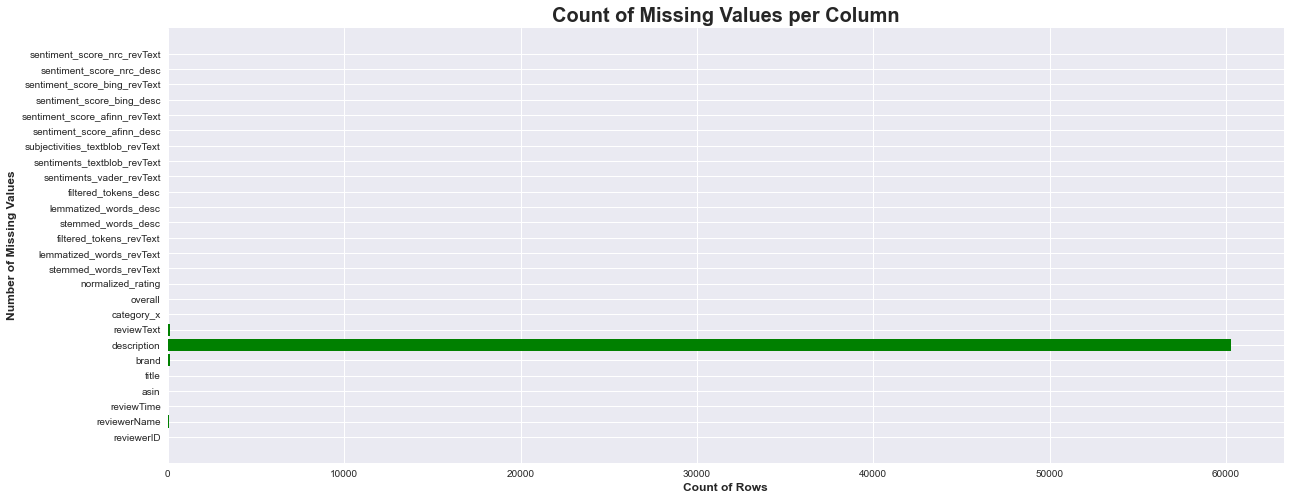

In [342]:
# Missing values
is_na = data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(data[data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", data.isna().sum())
    missing_values_count = data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Count of Rows", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

In [343]:
# only keep columns that are needed - drop description columns including sentiment scores
data = data[['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText','sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText','sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiment_score_nrc_revText']]
data.head(2)

reviewerID  reviewerName  reviewTime        asin  \
0    A3WJELEV137U  John Bennett  2015-06-05  0001526863   
1  A3OJM6TXMK3J53        samson  2015-12-05  0005164885   

                                               title  \
0  steve green hide em in your heart 13 bible mem...   
1                    christmas eve and other stories   

                      brand  \
0               steve green   
1  trans siberian orchestra   

                                         description  \
0  steve green hide em in your heart 13 bible mem...   
1  this is a concept album all the way with tales...   

                                          reviewText     category_x  overall  \
0  product worked as advertised and am pleased wi...  movies and tv      5.0   
1                     nice to hear this cd beautiful  cds and vinyl      5.0   

   normalized_rating                              stemmed_words_revText  \
0                1.0  ['product', 'work', 'advertis', 'pleas', 'resu...   
1                1.0                   ['nice', 'hear', 'cd', 'beauti']   

                            lemmatized_words_revText  \
0  ['product', 'worked', 'advertised', 'pleased',...   
1                ['nice', 'hear', 'cd', 'beautiful']   

                             filtered_tokens_revText  \
0  ['product', 'worked', 'advertised', 'pleased',...   
1                ['nice', 'hear', 'cd', 'beautiful']   

                            sentiments_vader_revText  \
0  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...   
1  {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...   

   sentiments_textblob_revText  subjectivities_textblob_revText  \
0                        0.500                              1.0   
1                        0.725                              1.0   

   sentiment_score_afinn_revText  sentiment_score_bing_revText  \
0                              3                             2   
1                              6                             2   

  sentiment_score_nrc_revText  
0                    positive  
1                    positive

***
# <a id='toc5_'></a>[Distribution Plots](#toc0_)

In [344]:
data.columns

Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText'],
      dtype='object')

## <a id='toc5_1_'></a>[Ratings](#toc0_)

Proportion of Review Ratings:
 5.0    0.675992
4.0    0.163936
3.0    0.075277
1.0    0.047501
2.0    0.037294
Name: overall, dtype: float64


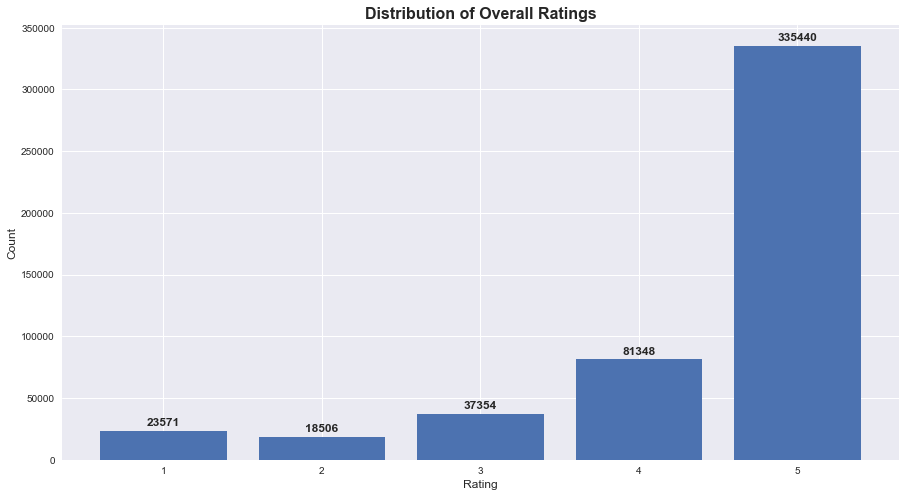

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to "seaborn"
plt.style.use('seaborn')

# Distribution of ratings
print("Proportion of Review Ratings:\n", data['overall'].value_counts(normalize=True))

# Make 'overall' into categorical variable
ratings = data['overall'].astype('category')

# Calculate the count for each rating category
rating_counts = ratings.value_counts().sort_index()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(rating_counts.index, rating_counts.values, color='#4c72b0')

# Annotate the height of each bar
for rect in bars:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)

# Add title and axis labels
ax.set_title("Distribution of Overall Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()


## <a id='toc5_2_'></a>[Categories](#toc0_)

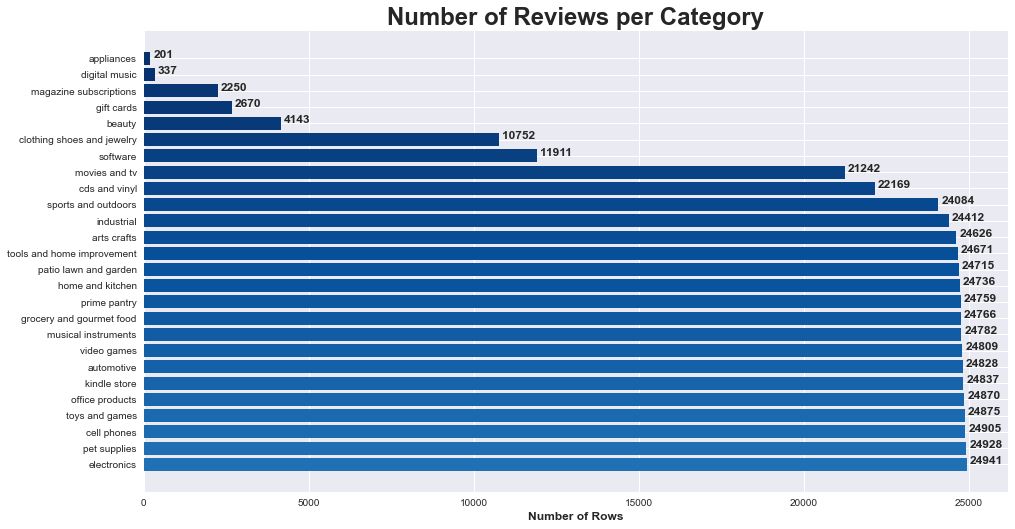

In [346]:
# biggest companies (most movies) - over 100 movies
value_counts_cat = data.category_x.value_counts()
colors = cm.Blues(np.linspace(0.75, 1, len(value_counts_cat)))

# Production Companies with most movies - bar
fig = plt.figure(figsize=(15, 8)) # create figure
bar = plt.barh(y=value_counts_cat.index, width=value_counts_cat.values, color=colors)
plt.title("Number of Reviews per Category", fontsize=24, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 10), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plt.show()


***
# <a id='toc6_'></a>[Reviewers](#toc0_)

In this section we look at:

- Top 10 Reviewers by Number of Reviews
- Average Rating against Number of Reviews per Reviewer
- Top 10 Reviewers by Length of Reviews
- Top 10 Reviewers by Average Rating (with at least 10 reviews)
- Top 10 Reviewers by Review Count



### <a id='toc6_1_1_'></a>[Top 10 Reviewers by Number of Reviews](#toc0_)

In [347]:
# How many customers
print("Number of Customers:", data.reviewerID.unique().size)

# Count Reviews and Average Rating per Customer
cust_data = data.groupby(['reviewerID']).agg({"overall": ["count", "mean"]})
cust_data.columns = ['count_rev', 'mean_rat']
cust_data['mean_rat'] = np.round(cust_data.mean_rat,3)
display(cust_data.sort_values(by='count_rev', ascending=False).head(5))

Number of Customers: 339625


count_rev  mean_rat
reviewerID                         
A3OXHLG6DIBRW8        101     4.545
A2582KMXLK2P06         77     4.039
A22CW0ZHY3NJH8         71     4.268
A20DZX38KRBIT8         68     3.309
A9Q28YTLYREO7          62     3.516

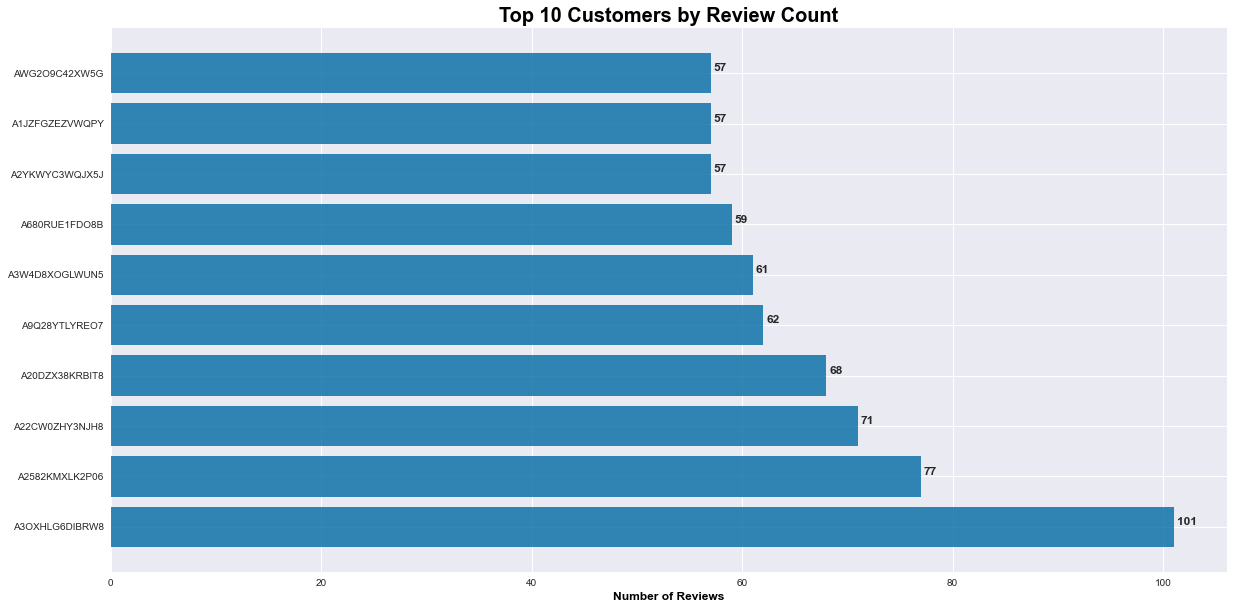

In [348]:
plt.style.use('tableau-colorblind10')

sample_top = cust_data.sort_values(['count_rev'], ascending=False).head(10)

# Top 10 customers by review count - bar plot
fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, alpha=0.8)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

plt.show()


### <a id='toc6_1_2_'></a>[Distribution of Number of Reviews](#toc0_)

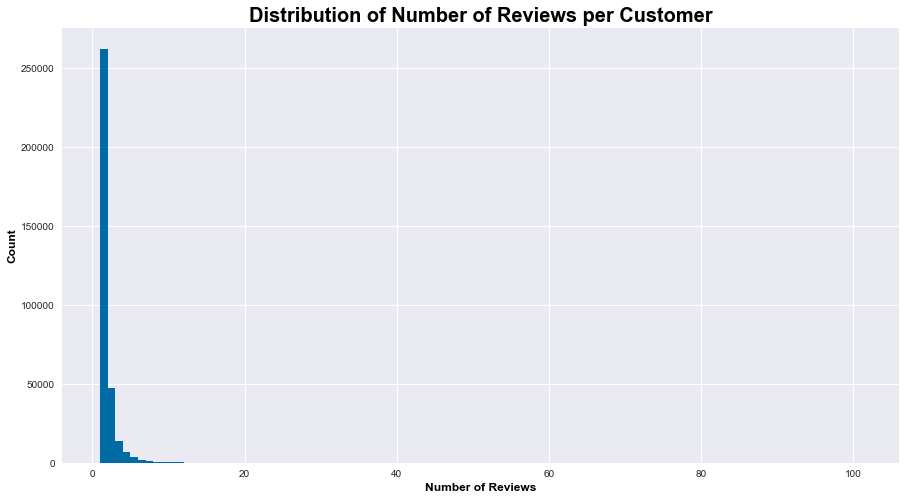

In [349]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data['count_rev'], bins=100)
plt.title("Distribution of Number of Reviews per Customer", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

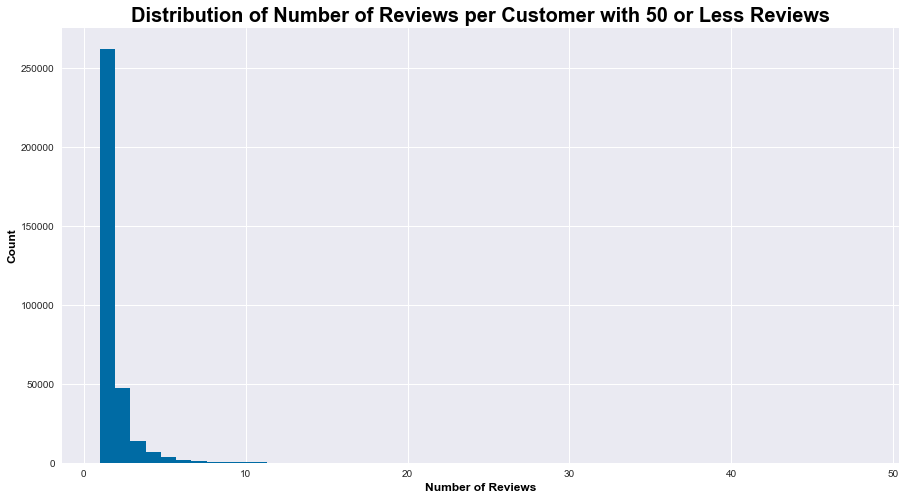

In [350]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data[cust_data['count_rev']<50]['count_rev'], bins=50)
plt.title("Distribution of Number of Reviews per Customer with 50 or Less Reviews", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

In [351]:
# count of reviewers with more than 5 reviews
print("Number of Customers with more than 5 Reviews:", cust_data[cust_data['count_rev']>5].shape[0])

Number of Customers with more than 5 Reviews: 5774


### <a id='toc6_1_3_'></a>[Average Rating against Number of Reviews per Reviewer](#toc0_)

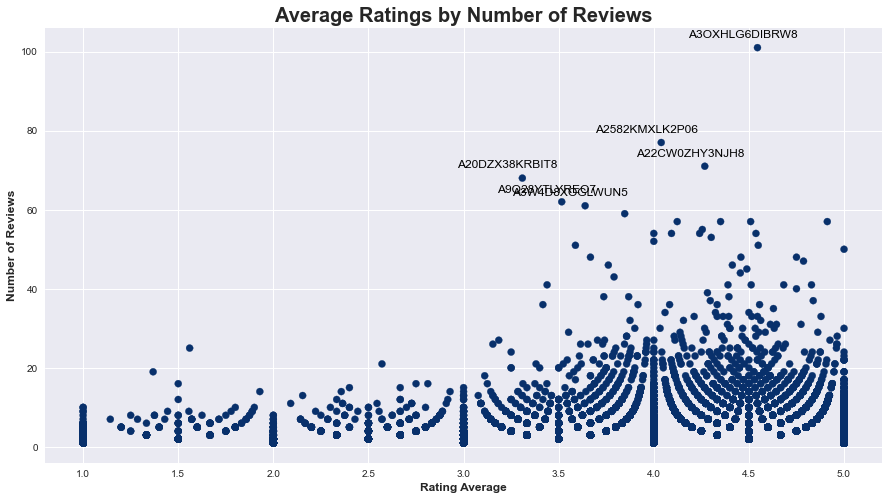

In [352]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.scatter(cust_data.mean_rat, cust_data.count_rev, c=cust_data.mean_rat, cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data.index):
    if cust_data.count_rev[i] > 60:
        plt.annotate(id, (cust_data.loc[cust_data.index == id, "mean_rat"], cust_data.loc[cust_data.index == id, "count_rev"]), textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=12, color='black')
    else:
        continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()


### <a id='toc6_1_4_'></a>[Top 10 Reviewers by Average Length of Reviews](#toc0_)

In [353]:
# Function to count sentences in a given text
def count_sentences(text):
    if isinstance(text, str):
        sentences = nltk.sent_tokenize(text)
        return len(sentences)
    else:
        return 0

# Function to count words in a given text
def count_words(text):
    if isinstance(text, str):
        words = text.split()
        return len(words)
    else:
        return 0

# Function to count characters in a given text
def count_characters(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0

# Apply the function to the 'reviewText' column
data['review_sentence_count'] = data['reviewText'].apply(count_sentences)

# Apply the function to the 'reviewText' column
data['review_word_count'] = data['reviewText'].apply(count_words)

# Apply the function to the 'reviewText' column
data['review_character_count'] = data['reviewText'].apply(count_characters)


In [354]:
top_10_rev_len = data.groupby(['reviewerID']).agg({"review_word_count": "mean"})
top_10_rev_len.sort_values(by='review_word_count', ascending=False).head(10)

review_word_count
reviewerID                       
A2VLMACQXTDKKP             4909.0
A1JLJOU8I57H13             4047.0
A2DZK4B2FTFCQZ             3667.0
A2Z9FXHC1L66EW             3432.0
A3QKLZ0UHTGXYN             3255.0
A3U7HS3TEX6B90             3128.0
A2DOTE0Y3SY7M2             3072.0
A3I4CJN64J5ZGZ             3034.0
A25XZFC0A27OGF             2995.5
A2JNTDHN3E8DLR             2806.0

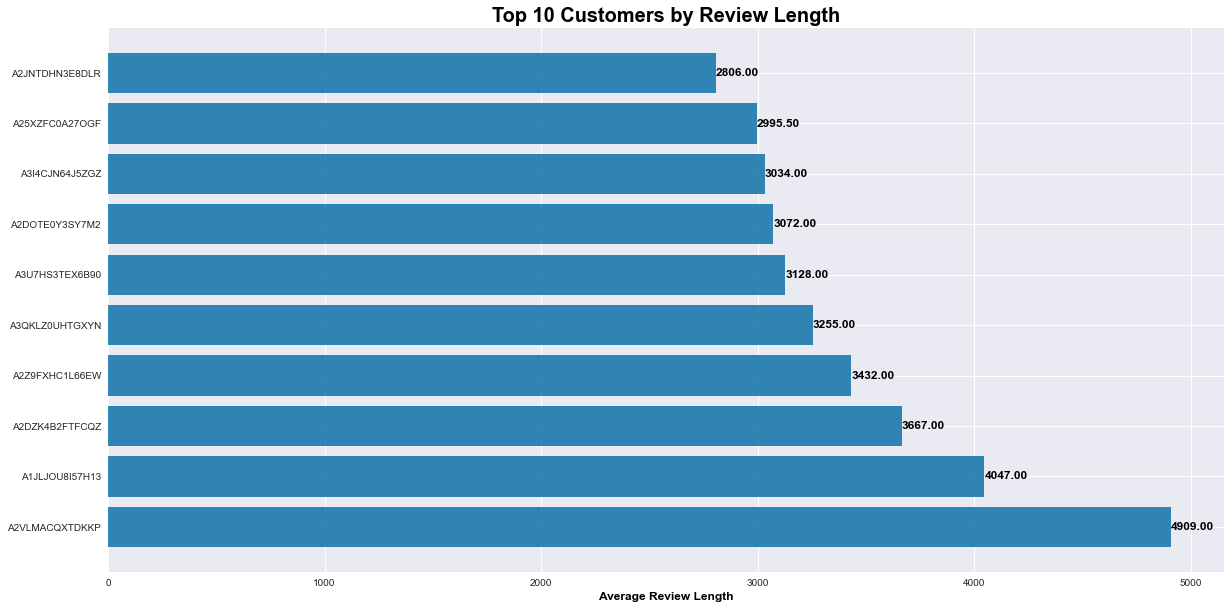

In [355]:
# Top 10 customers by review length - bar plot
fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=top_10_rev_len.sort_values(['review_word_count'], ascending=False).head(10).index,
               width=top_10_rev_len.sort_values(['review_word_count'], ascending=False).head(10).review_word_count,
               alpha=0.8)

# Add average review length as text
for rect in bar:
    width = rect.get_width()
    y = rect.get_y() + rect.get_height() / 2
    plt.text(width, y, f'{width:.2f}', ha='left', va='center', color='black', fontweight='semibold', fontsize=12)

plt.title("Top 10 Customers by Review Length", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Average Review Length", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
plt.show()

### <a id='toc6_1_5_'></a>[Top 10 Reviewers by Average Rating (with at least 50 reviews)](#toc0_)

count_rev  mean_rat
reviewerID                         
AWG2O9C42XW5G          57     4.912
A1GQAKL9CGQLP1         51     4.549
A3OXHLG6DIBRW8        101     4.545
AMMNGUJK4HQJ5          54     4.537
A2R1HUYHXV7H18         57     4.509
A2YKWYC3WQJX5J         57     4.351
A3L1VJMHFWONCB         53     4.302
A22CW0ZHY3NJH8         71     4.268
A3V6Z4RCDGRC44         55     4.255
A3NHUQ33CFH3VM         54     4.241

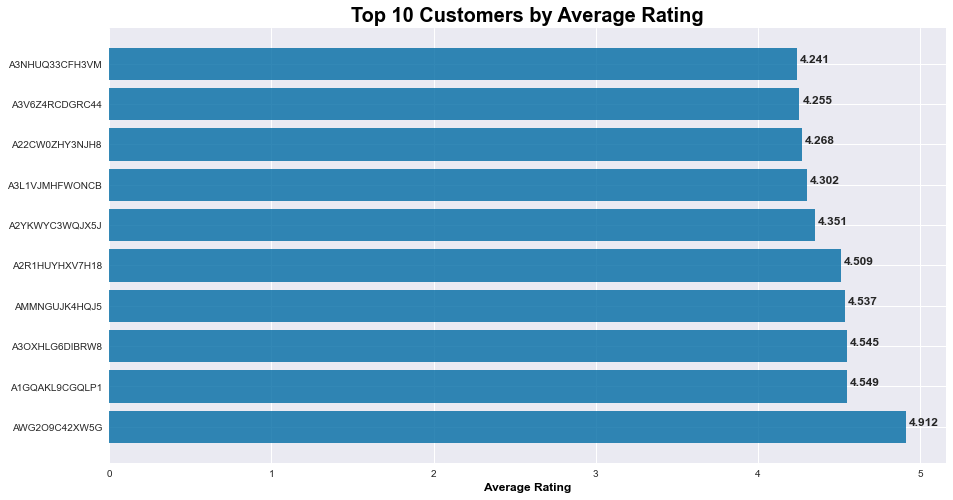

In [356]:
# top 10 customers by average rating
display(cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10))

# bar plot of top 10 customers by average rating
fig = plt.figure(figsize=(15,8))
bar = plt.barh(y=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).index, width=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).mean_rat, alpha=0.8)
plt.title("Top 10 Customers by Average Rating", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 20), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
plt.show()

***
# <a id='toc7_'></a>[Products](#toc0_)


### <a id='toc7_1_1_'></a>[Top 10 Products by Number of Reviews](#toc0_)

In [357]:
# How many items/products?
print("Number of Products:", data.asin.unique().size)

# Number reviews and average ratings per product
prod_data = data.groupby(['asin']).agg({"overall": ["count", "mean"]})
prod_data.columns = ['count_rev', 'mean_rat']
prod_data['mean_rat'] = np.round(prod_data.mean_rat,3)
display(prod_data.sort_values(by='count_rev', ascending=False).head(10))

Number of Products: 251615


count_rev  mean_rat
asin                           
B0012Y0ZG2        878     4.842
B000URXP6E        856     4.838
B001OHV1H4        488     4.762
B00006L9LC        488     4.762
B000FI4S1E        391     4.941
B0009RF9DW        391     4.941
B0013BKDO8        336     4.438
B00DRALJ28        285     4.344
B000EORV8Q        232     4.931
B0001FS9NE        230     4.930

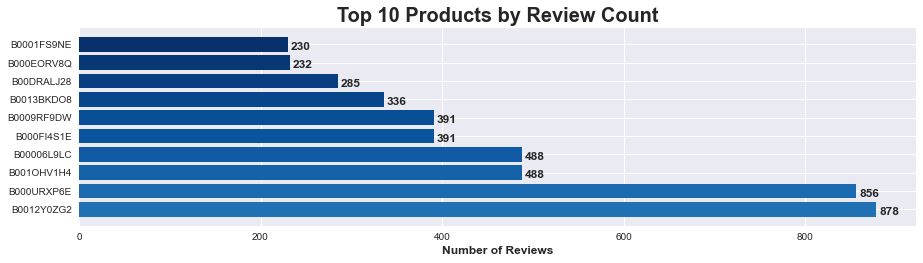

In [358]:
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = prod_data.sort_values(['count_rev'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Products by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


In [359]:
# what are these products in sample_top?
data[data.asin.isin(sample_top.index)][['title', 'asin']].drop_duplicates()


title        asin
27919        citre shine moisture burst shampoo  16 fl oz  B00006L9LC
35304      sony vaio 80211abg ethernet converter pcwade80  B0001FS9NE
57303   yardley by yardley of london unisexs lay it on...  B0009RF9DW
70574             irocks red usb 20 illuminated 4port hub  B000EORV8Q
73156   fruits amp passion blue refreshing shower gel ...  B000FI4S1E
101007  bonne bell smackers bath and body starburst co...  B000URXP6E
125471  bath amp body works ile de tahiti moana coconu...  B0012Y0ZG2
127678  acurite 00613 humidity monitor with indoor the...  B0013BKDO8
163449  avalon grapefruit and geranium smoothing shamp...  B001OHV1H4
303206  acurite 00613 humidity monitor with indoor the...  B00DRALJ28

### <a id='toc7_1_2_'></a>[Top 10 Products by Average Rating](#toc0_)

Look at products with more than 100 Reviews

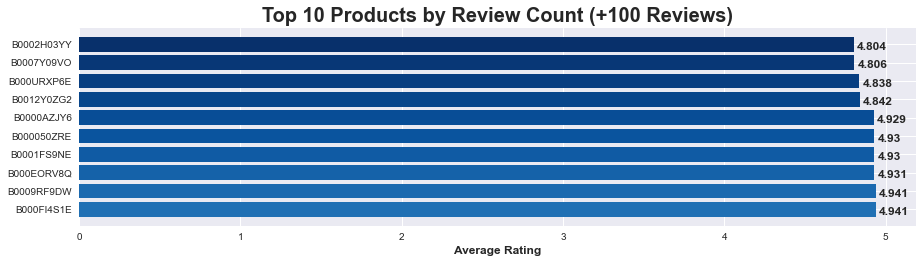

In [360]:
# Plot of Highest Average Ratings
plt.style.use('seaborn-darkgrid')
sample_top = prod_data[prod_data.count_rev > 100].sort_values(['mean_rat'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.mean_rat, color=colors)
plt.title("Top 10 Products by Review Count (+100 Reviews)", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


In [361]:
# What are these products in sample_top?
data[data.asin.isin(sample_top.index)][['title', 'asin']].drop_duplicates()

title        asin
18807                 key span 4port usb hub  white uh4wh  B000050ZRE
32261          iogear powerlinehomeplug wall mount ghpu21  B0000AZJY6
35304      sony vaio 80211abg ethernet converter pcwade80  B0001FS9NE
44845   daddario exl120 nickel wound electric guitar s...  B0002H03YY
54403   daddario ej17b25 phosphor bronze acoustic guit...  B0007Y09VO
57303   yardley by yardley of london unisexs lay it on...  B0009RF9DW
70574             irocks red usb 20 illuminated 4port hub  B000EORV8Q
73156   fruits amp passion blue refreshing shower gel ...  B000FI4S1E
101007  bonne bell smackers bath and body starburst co...  B000URXP6E
125471  bath amp body works ile de tahiti moana coconu...  B0012Y0ZG2

### <a id='toc7_1_3_'></a>[Product Average Rating vs Number of Reviews](#toc0_)

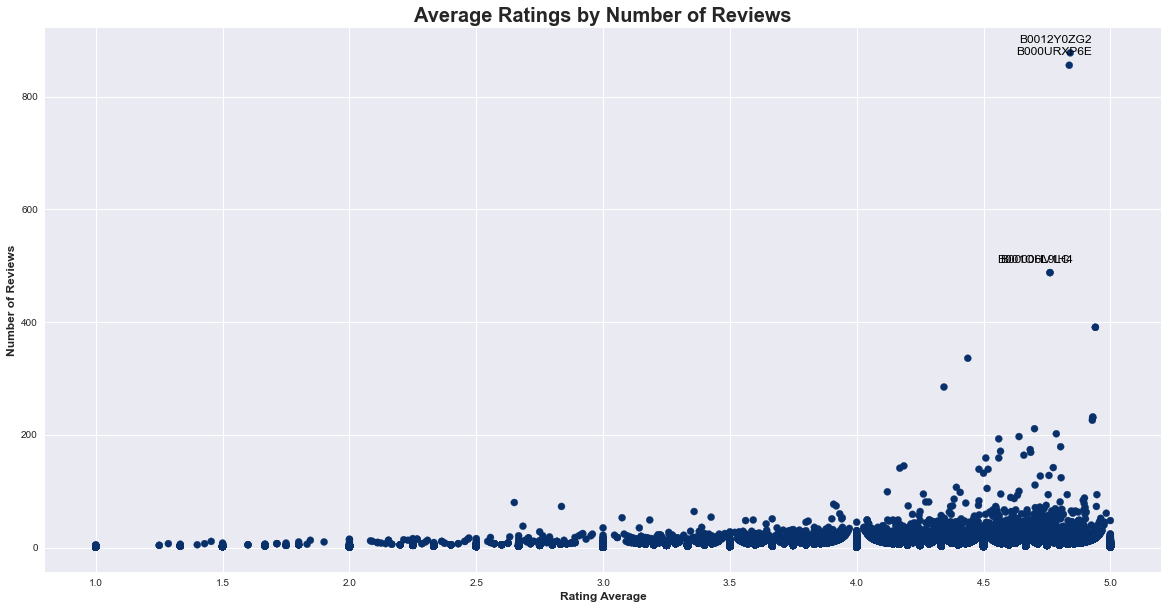

In [362]:
# Plot of Average Rating vs Count Reviews
fig = plt.figure(figsize=(20, 10))

plt.scatter(prod_data.mean_rat, prod_data.count_rev, c=prod_data.mean_rat,  cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(prod_data.index):
    if (prod_data.count_rev[i] >= 400):
        if id == 'B0001FS9NE':
            xytext = (15, -15)
        else: xytext=(-15,10)
        plt.annotate(id, (prod_data.loc[prod_data.index==id, "mean_rat"], prod_data.loc[prod_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()

### <a id='toc7_1_4_'></a>[Number of Reviews per Product over Time](#toc0_)

For products with over 100 reviews

In [363]:
asin = prod_data[prod_data.count_rev > 100].sort_values(by='mean_rat', ascending=False).index
print("Number of Products with more than 100 reviews:", len(asin))

# plot reviews per product in asin over time
print("First Review:", data.reviewTime.min(), "\nLast Review:", data.reviewTime.max())


Number of Products with more than 100 reviews: 35
First Review: 1998-04-28 
Last Review: 2018-10-03


In [364]:
# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
prod_year_count = filtered_data.groupby(['asin', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(prod_year_count.head(5))

asin  reviewYear  count_rev
0  B000050ZRE        2002          2
1  B000050ZRE        2003          1
2  B000050ZRE        2004          6
3  B000050ZRE        2005          4
4  B000050ZRE        2006          1

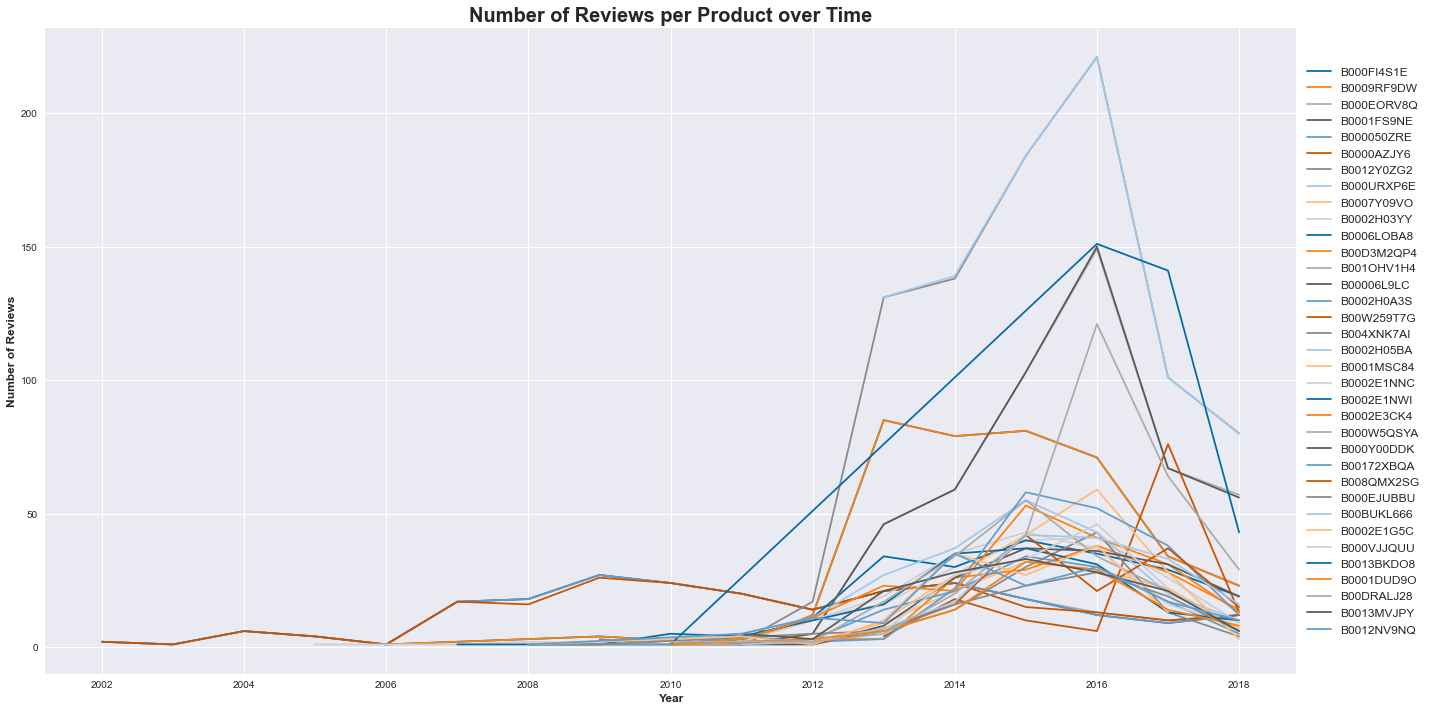

In [365]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_count[prod_year_count.asin==id].reviewYear, prod_year_count[prod_year_count.asin==id].count_rev, label=id)
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [366]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_count[prod_year_count.asin==id].reviewYear,
                             y=prod_year_count[prod_year_count.asin==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc7_1_5_'></a>[Average Rating per Product over Time](#toc0_)

In [367]:
import pandas as pd

# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
prod_year_avg_rating = filtered_data.groupby(['asin', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
prod_year_avg_rating.avg_rating = np.round(prod_year_avg_rating.avg_rating, 3)
display(prod_year_avg_rating.head(5))


asin  reviewYear  avg_rating
0  B000050ZRE        2002         5.0
1  B000050ZRE        2003         5.0
2  B000050ZRE        2004         5.0
3  B000050ZRE        2005         5.0
4  B000050ZRE        2006         5.0

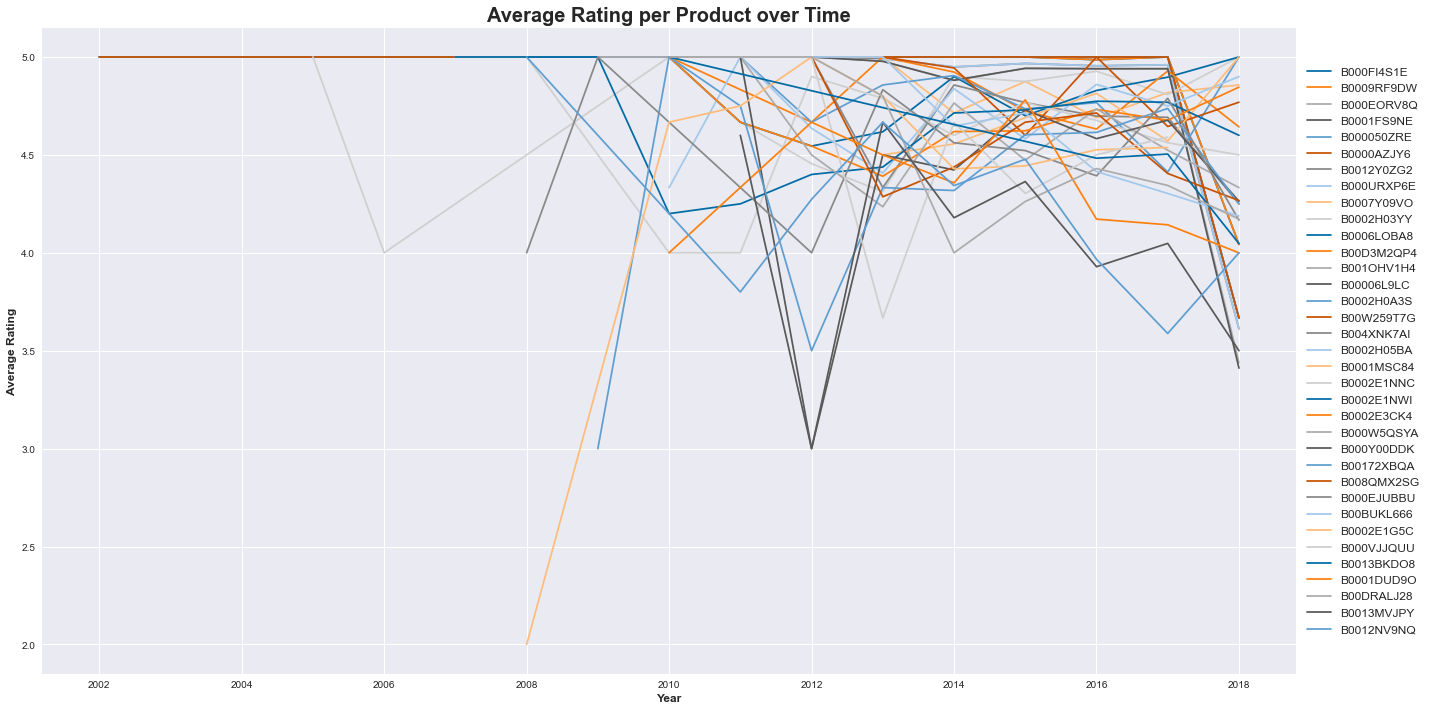

In [368]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear, prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating, label=id)
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [369]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear,
                             y=prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
# <a id='toc8_'></a>[Categories](#toc0_)

In [370]:
# How many items/products?
print("Number of Categories:", data.category_x.unique().size)

# Number reviews and average ratings per category
cat_count = data.groupby(['category_x']).agg({"overall": ["count", "mean"]})
cat_count.columns = ['count_rev', 'mean_rat']
cat_count['mean_rat'] = np.round(cat_count.mean_rat,3)
display(cat_count.sort_values(by='count_rev', ascending=False).head(10))

Number of Categories: 26


count_rev  mean_rat
category_x                                   
electronics                   24941     4.255
pet supplies                  24928     4.269
cell phones                   24905     4.231
toys and games                24875     4.470
office products               24870     4.471
kindle store                  24837     4.401
automotive                    24828     4.463
video games                   24809     4.221
musical instruments           24782     4.470
grocery and gourmet food      24766     4.437

### <a id='toc8_1_1_'></a>[Categories by Average Rating](#toc0_)

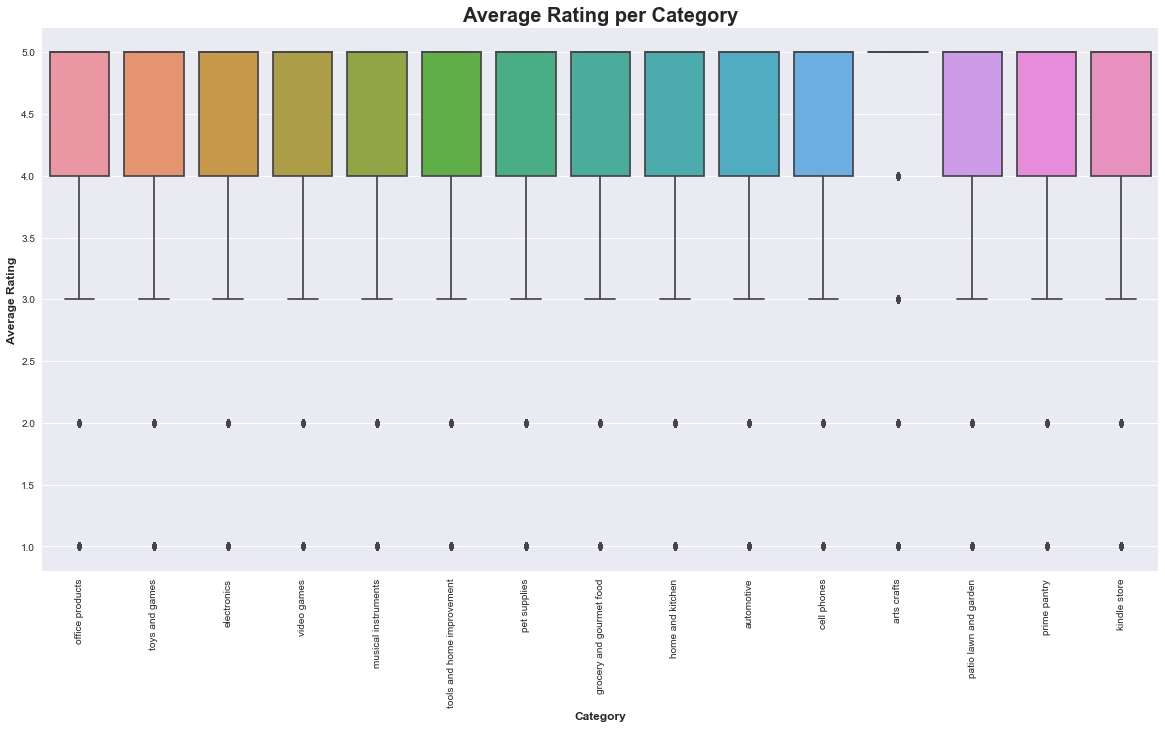

In [371]:
# boxplot of average rating per category using cat_count
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='category_x', y='overall', data=data[data.category_x.isin(cat_count.sort_values(by='count_rev', ascending=False).head(15).index)])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category", fontsize=20, fontweight='bold')
plt.show()


In [372]:
# get the average rating per category
data.groupby(['category_x'])['overall'].mean().reset_index(name='avg_rating')


category_x  avg_rating
0                   appliances    4.592040
1                  arts crafts    4.574068
2                   automotive    4.462703
3                       beauty    4.772387
4                cds and vinyl    4.424196
5                  cell phones    4.230636
6   clothing shoes and jewelry    4.239025
7                digital music    4.391691
8                  electronics    4.255162
9                   gift cards    4.896629
10    grocery and gourmet food    4.436930
11            home and kitchen    4.354625
12                  industrial    4.530067
13                kindle store    4.401296
14      magazine subscriptions    4.315111
15               movies and tv    4.220130
16         musical instruments    4.470261
17             office products    4.470808
18       patio lawn and garden    4.322072
19                pet supplies    4.268975
20                prime pantry    4.539279
21                    software    3.878516
22         sports and outdoors    4.406245
23  tools and home improvement    4.406550
24              toys and games    4.469869
25                 video games    4.221250

### <a id='toc8_1_2_'></a>[Average Rating of Categories over Time](#toc0_)

In [373]:
# categories with more than 1000 reviews
categories = data.groupby(['category_x']).size()[data.groupby(['category_x']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category_x'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
cat_year_count = filtered_data.groupby(['category_x', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(cat_year_count.head(5))

category_x  reviewYear  count_rev
0  arts crafts        2006          1
1  arts crafts        2007          2
2  arts crafts        2008          8
3  arts crafts        2009         21
4  arts crafts        2010         51

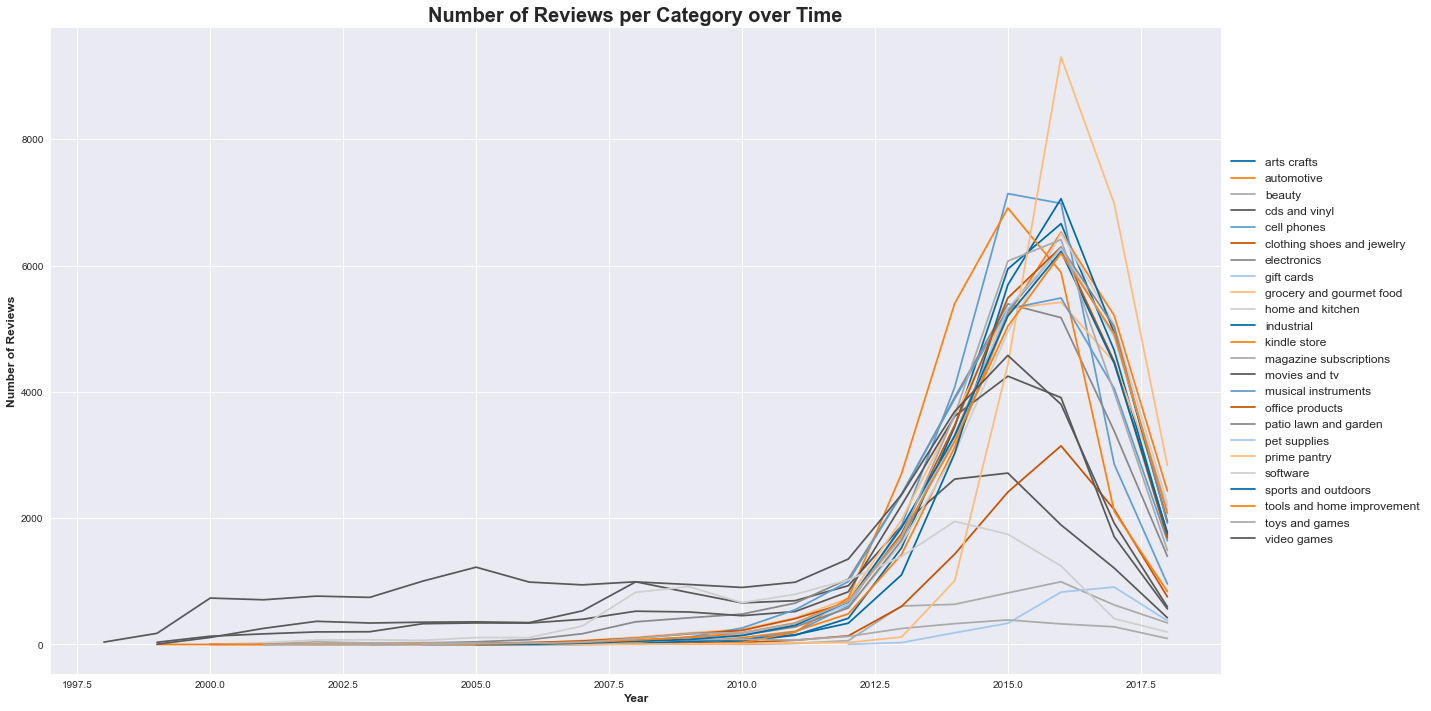

In [374]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_count[cat_year_count.category_x==id].reviewYear, cat_year_count[cat_year_count.category_x==id].count_rev, label=id)
    last_count = cat_year_count[cat_year_count.category_x==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [375]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_count[cat_year_count.category_x==id].reviewYear,
                             y=cat_year_count[cat_year_count.category_x==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = cat_year_count[cat_year_count.category_x==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc8_1_3_'></a>[Average Rating per Category over Time](#toc0_)

In [376]:
# categories with more than 1000 reviews
categories = data.groupby(['category_x']).size()[data.groupby(['category_x']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category_x'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
cat_year_avg_rating = filtered_data.groupby(['category_x', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
cat_year_avg_rating.avg_rating = np.round(cat_year_avg_rating.avg_rating, 3)
display(cat_year_avg_rating.head(5))


category_x  reviewYear  avg_rating
0  arts crafts        2006       4.000
1  arts crafts        2007       5.000
2  arts crafts        2008       4.625
3  arts crafts        2009       4.524
4  arts crafts        2010       4.392

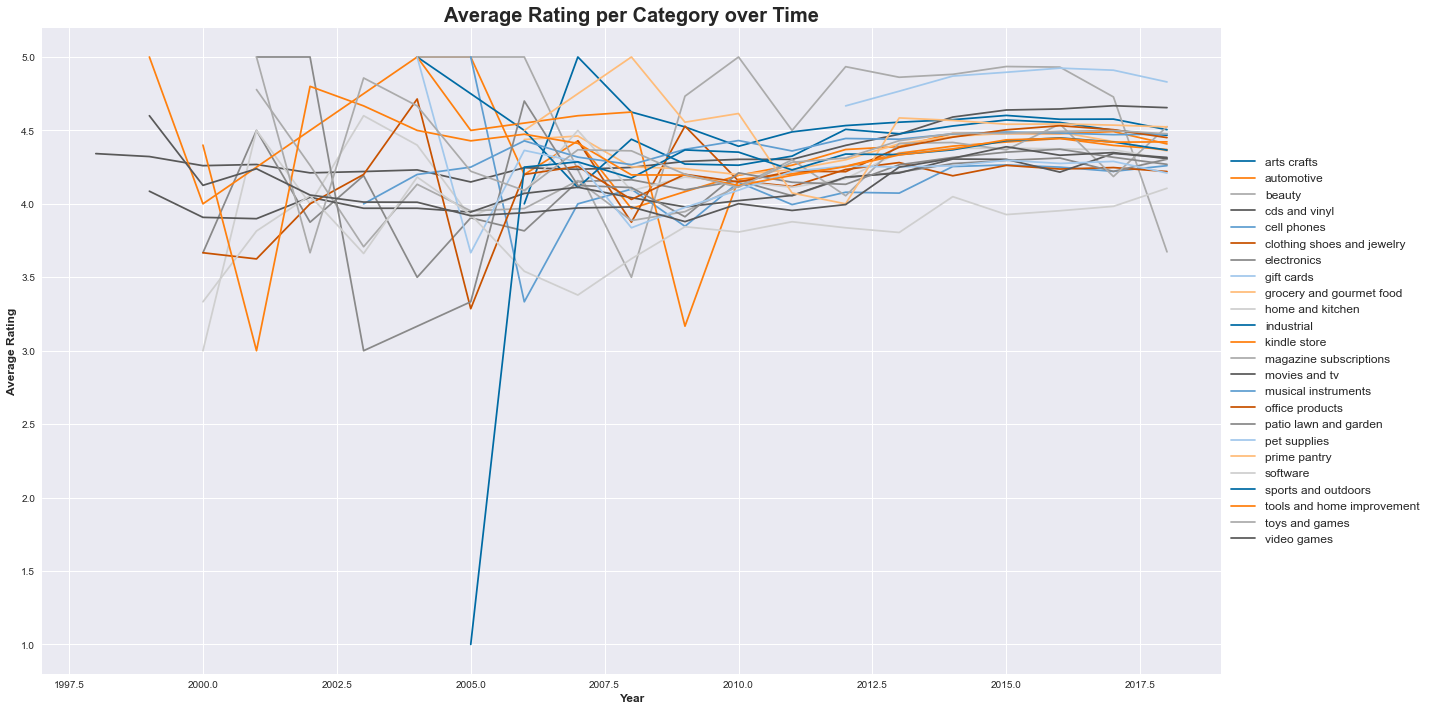

In [377]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_avg_rating[cat_year_avg_rating.category_x==id].reviewYear, cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating, label=id)
    last_count = cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [378]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_avg_rating[cat_year_avg_rating.category_x==id].reviewYear,
                             y=cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
# <a id='toc9_'></a>[Reviews and Review Text](#toc0_)

### <a id='toc9_1_1_'></a>[Review Length vs Rating](#toc0_)

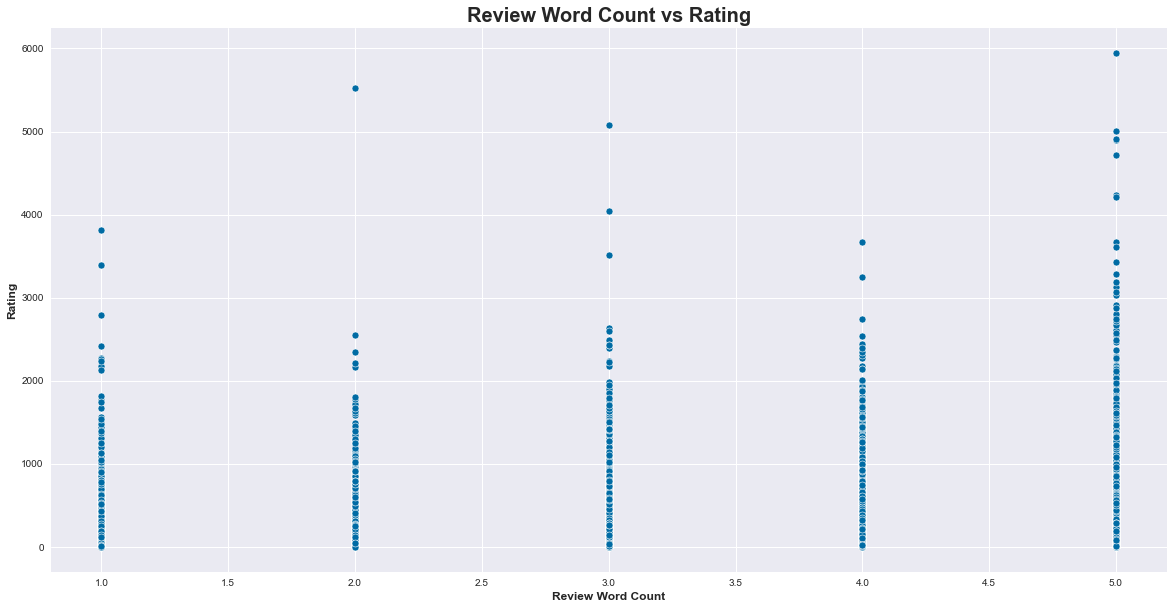

In [379]:
# scatter plot review_word_count vs overall
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(y='review_word_count', x='overall', data=data)
plt.xlabel('Review Word Count', fontsize=12, fontweight='semibold')
plt.ylabel('Rating', fontsize=12, fontweight='semibold')
plt.title("Review Word Count vs Rating", fontsize=20, fontweight='bold')
plt.show()

In [380]:
# get mean review_word_count per rating ()
data.groupby(['overall'])['review_word_count'].mean().reset_index(name='avg_review_word_count')


overall  avg_review_word_count
0      1.0              72.418226
1      2.0              83.414784
2      3.0              83.685897
3      4.0              81.762588
4      5.0              47.386373

### <a id='toc9_1_2_'></a>[Top 10 Reviews by Length](#toc0_)

In [381]:
# see data
display(data[['reviewText', 'review_character_count', 'review_word_count', 'review_sentence_count']].head(3))

print(data.reviewText[0])
print(data.reviewText[1])
print(data.reviewText[2])

reviewText  review_character_count  \
0  product worked as advertised and am pleased wi...                      56   
1                     nice to hear this cd beautiful                      30   
2  that one song has to be one of the best in ccm...                     356   

   review_word_count  review_sentence_count  
0                  9                      1  
1                  6                      1  
2                 72                      1

product worked as advertised and am pleased with results
nice to hear this cd beautiful
that one song has to be one of the best in ccm it tells the story of the resurrection from peters eyes it is very true to the bible in its lyrics adam where are you is another solid song this album has been forgotten by people who like heavier music dont let the long hair and early 70s look fool you this album is for people of all ages truely sensational


In [382]:
# top 10 longest reviews
display(data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10))

# view the review
data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10).values


136490    for operating a refrigerator or freezer  only ...
170273    update  this machine is way overpriced now i g...
227521    fuzzy wuzzys summary highly recommended with w...
260192    fuzzy wuzzys summary highly recommended with w...
260180    fuzzy wuzzys summary highly recommended with w...
19591     update 42313 if youve installed windows 7 or 8...
460616    warning this is a long complicated review if y...
227266    fuzzy wuzzys summary highly recommended with w...
290135    with the high sales of the first volume wwe qu...
17739     back in january of 2000 squaresoft was in the ...
Name: reviewText, dtype: object

array(['for operating a refrigerator or freezer  only step by step complete directions update 081511 mounted on the frig added pictures of how i mounted it to the frig i did this as an after thought and have a ton of regrets on the mounting design pictured so i can tell you a whole bunch of ways to improve on this the mount is simple pvc plastic plumbing pipes used one step spray paint made for plastic and metal 4 first dont do the complicated f shape shape of the assembled pipes with all the t fittings and elbows i used because you cant thread the thermostat thru the fittings and they are unnecessary anyway if you look at the picture note that i used t fittings to make it stand off the frig an inch or so this added a lot of complication for no reason whatsoever for yours simple make a f or c shape with 1 pvc pipes and the part that touches the frig will be nothing but a pipe no fittings on it drill hole thru pipes for mounting drill pilot hole thru frig sheet metal then use sheet meta

### <a id='toc9_1_3_'></a>[Number of Reviews over Time](#toc0_)

In [383]:
# get number of reviews per year
year_data = data.copy()
year_data['reviewTime'] = data['reviewTime'].dt.year
year_count = year_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

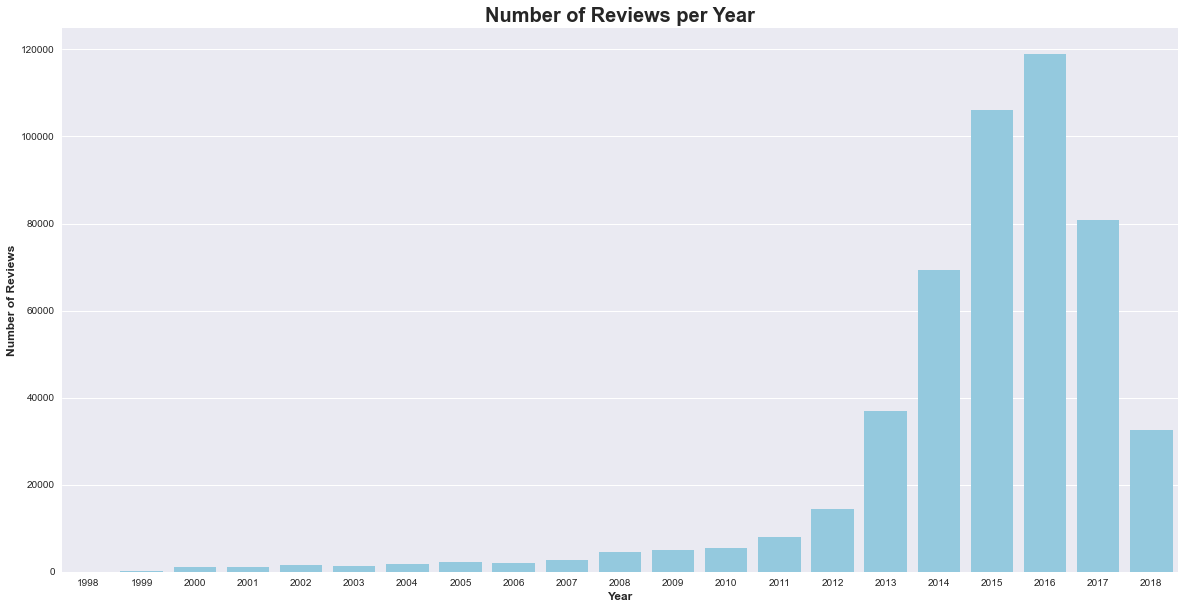

In [384]:
# plot number of reviews per year
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=year_count,  color='skyblue')
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Year", fontsize=20, fontweight='bold')
plt.show()

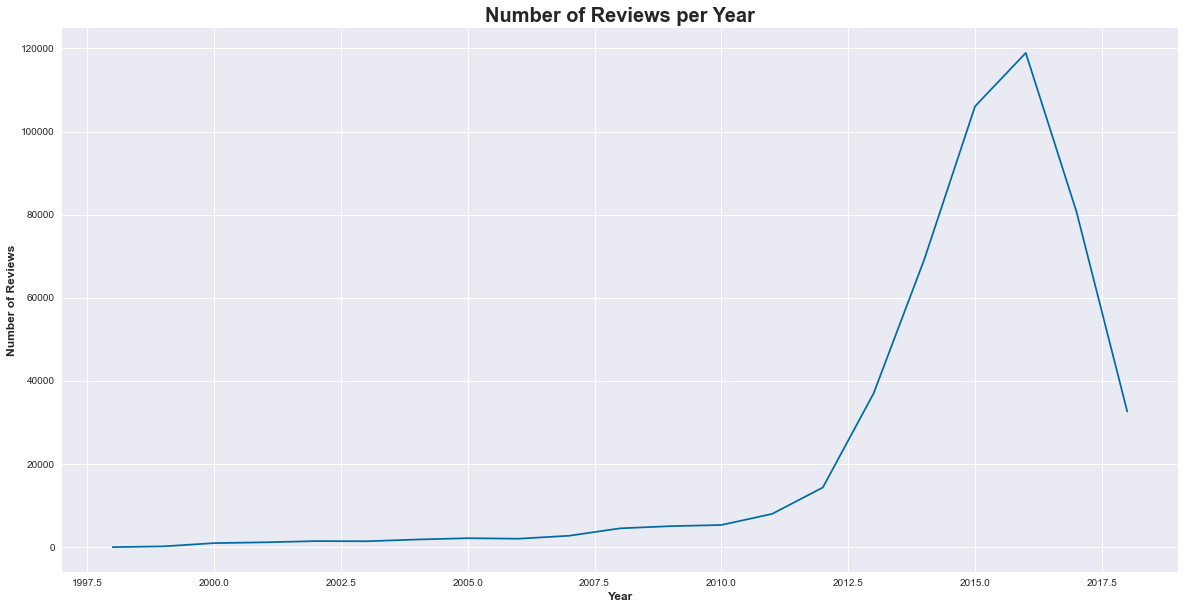

In [385]:
# line plot number of reviews per year
fig = plt.figure(figsize=(20, 10))
plt.plot(year_count.reviewTime, year_count.count_rev)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Year", fontsize=20, fontweight='bold')
plt.show()

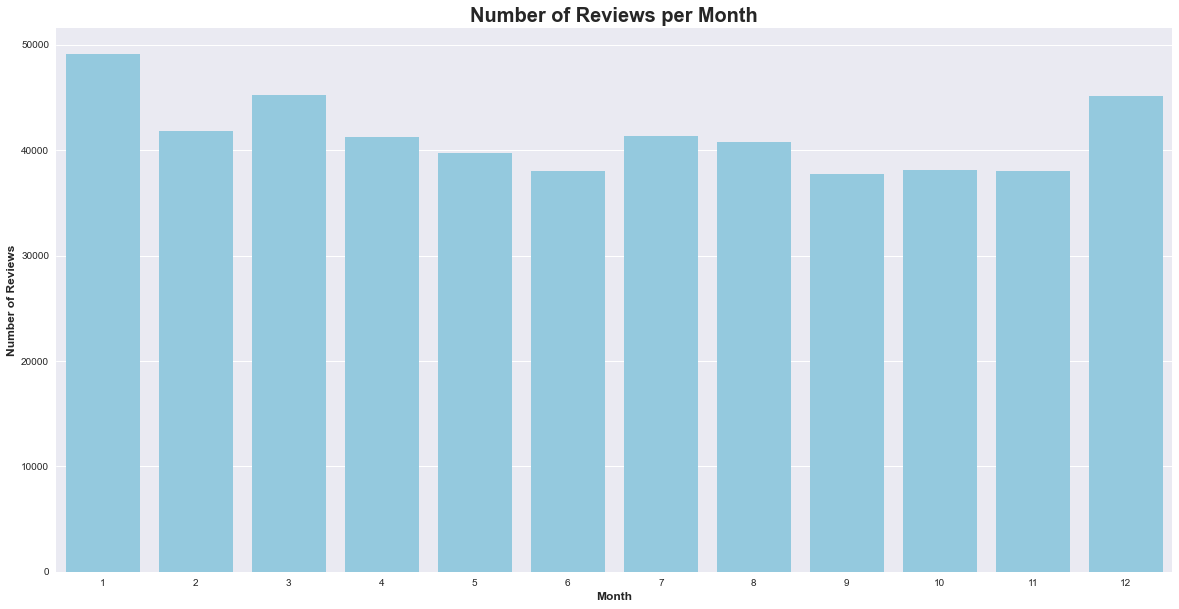

In [386]:
# get number of reviews per month
month_data = data.copy()
month_data['reviewTime'] = data['reviewTime'].dt.month
month_count = month_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

# plot number of reviews per month
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=month_count,  color='skyblue')
plt.xlabel('Month', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Month", fontsize=20, fontweight='bold')
plt.show()

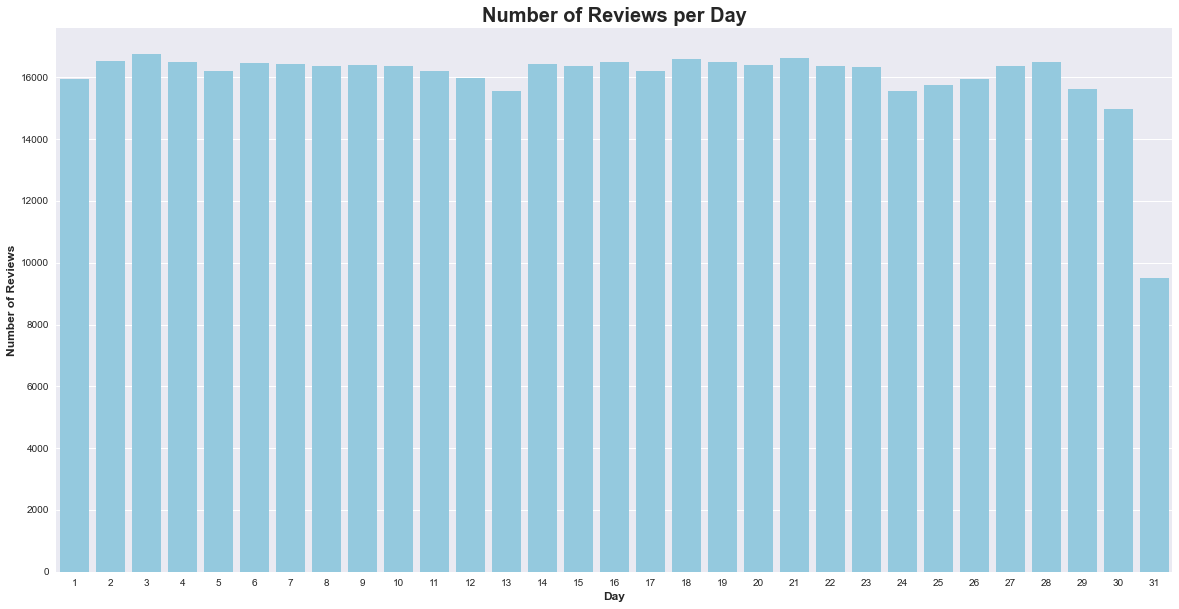

In [387]:
# number of reviews per day
day_data = data.copy()
day_data['reviewTime'] = data['reviewTime'].dt.day
day_count = day_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

# plot number of reviews per day
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=day_count,  color='skyblue')
plt.xlabel('Day', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Day", fontsize=20, fontweight='bold')
plt.show()

***
# <a id='toc10_'></a>[Brands](#toc0_)

### <a id='toc10_1_1_'></a>[Top 10 Brands by Number of Reviews](#toc0_)

In [388]:
data.head(3)

reviewerID     reviewerName reviewTime        asin  \
0    A3WJELEV137U     John Bennett 2015-06-05  0001526863   
1  A3OJM6TXMK3J53           samson 2015-12-05  0005164885   
2  A14YR7QK3ASFFW  Amazon Customer 2001-04-24  0005465079   

                                               title  \
0  steve green hide em in your heart 13 bible mem...   
1                    christmas eve and other stories   
2                                           forgiven   

                      brand  \
0               steve green   
1  trans siberian orchestra   
2             don francisco   

                                         description  \
0  steve green hide em in your heart 13 bible mem...   
1  this is a concept album all the way with tales...   
2  1 jesus lord of the way i feel 2 jehoshaphat 3...   

                                          reviewText     category_x  overall  \
0  product worked as advertised and am pleased wi...  movies and tv      5.0   
1                     nice to hear this cd beautiful  cds and vinyl      5.0   
2  that one song has to be one of the best in ccm...  cds and vinyl      5.0   

   ...                            filtered_tokens_revText  \
0  ...  ['product', 'worked', 'advertised', 'pleased',...   
1  ...                ['nice', 'hear', 'cd', 'beautiful']   
2  ...  ['one', 'song', 'one', 'best', 'ccm', 'tells',...   

                            sentiments_vader_revText  \
0  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...   
1  {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...   
2  {'neg': 0.058, 'neu': 0.803, 'pos': 0.139, 'co...   

  sentiments_textblob_revText subjectivities_textblob_revText  \
0                    0.500000                        1.000000   
1                    0.725000                        1.000000   
2                    0.361944                        0.435278   

  sentiment_score_afinn_revText  sentiment_score_bing_revText  \
0                             3                             2   
1                             6                             2   
2                             4                             3   

   sentiment_score_nrc_revText  review_sentence_count  review_word_count  \
0                     positive                      1                  9   
1                     positive                      1                  6   
2                      sadness                      1                 72   

  review_character_count  
0                     56  
1                     30  
2                    356  

[3 rows x 23 columns]

In [389]:
# How many brands?
print("Number of Brands:", data.brand.unique().size)

# Number reviews and average ratings per brand
brand_data = data.groupby(['brand']).agg({"overall": ["count", "mean"]})
brand_data.columns = ['count_rev', 'mean_rat']
brand_data['mean_rat'] = np.round(brand_data.mean_rat,3)
display(brand_data.sort_values(by='count_rev', ascending=False).head(10))

Number of Brands: 68503


count_rev  mean_rat
brand                                  
by nintendo              2333     4.556
by electronic arts       2021     4.073
microsoft                1917     3.622
by sony                  1791     4.334
intuit                   1653     3.721
samsung                  1541     4.284
daddario                 1472     4.696
by microsoft             1410     4.257
by ubisoft               1245     4.124
generic                  1225     4.126

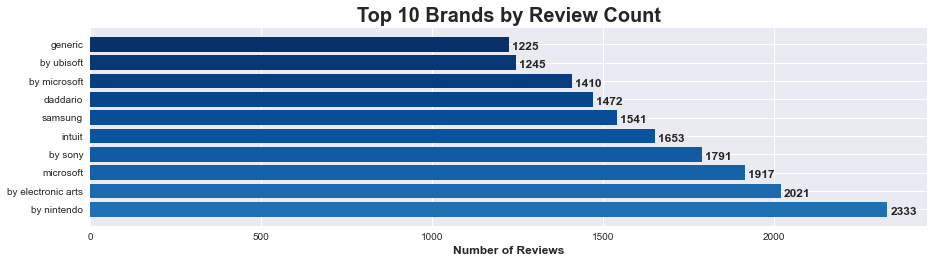

In [390]:
# bar plot 
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = brand_data.sort_values(['count_rev'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Brands by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


### <a id='toc10_1_2_'></a>[Top 10 Brands by Average Rating](#toc0_)

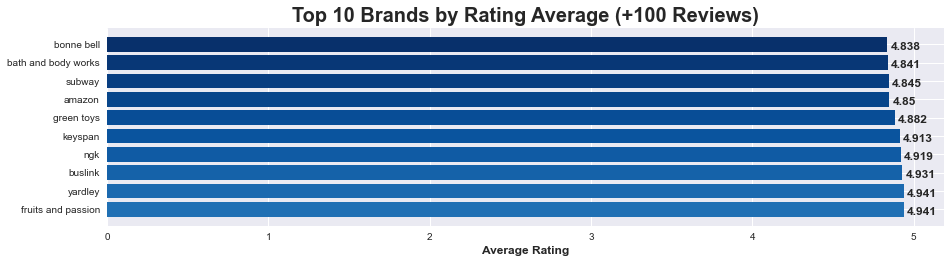

In [391]:
# Plot of Highest Average Ratings
plt.style.use('seaborn-darkgrid')
sample_top = brand_data[brand_data.count_rev > 100].sort_values(['mean_rat'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.mean_rat, color=colors)
plt.title("Top 10 Brands by Rating Average (+100 Reviews)", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


### <a id='toc10_1_3_'></a>[Brand Average Rating vs Number of Reviews](#toc0_)

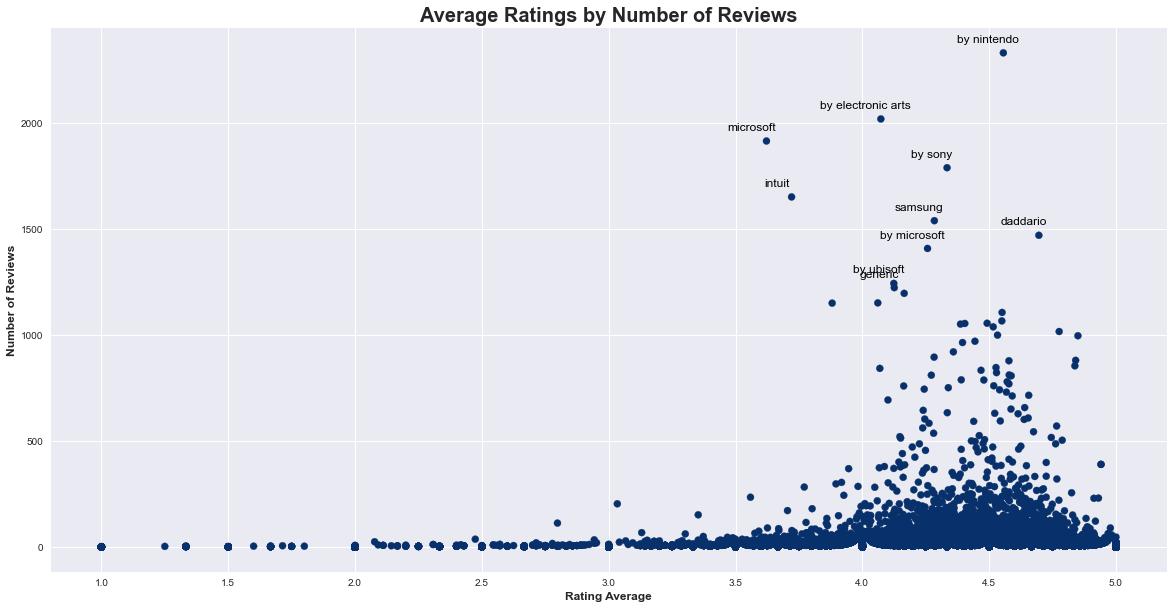

In [392]:
# Plot of Average Rating vs Count Reviews
fig = plt.figure(figsize=(20, 10))

plt.scatter(brand_data.mean_rat, brand_data.count_rev, c=brand_data.mean_rat,  cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(brand_data.index):
    if (brand_data.count_rev[i] >= 1200):
        xytext=(-15,10)
        plt.annotate(id, (brand_data.loc[brand_data.index==id, "mean_rat"], brand_data.loc[brand_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()


### <a id='toc10_1_4_'></a>[Average Rating of Brands over Time for Top 10 Brands](#toc0_)





In [393]:
brand = brand_data[brand_data.count_rev > 1000].sort_values(by='mean_rat', ascending=False).index

# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['brand'].isin(brand)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
brand_year_count = filtered_data.groupby(['brand', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(brand_year_count.head(5))

brand  reviewYear  count_rev
0    3m        2007          1
1    3m        2008          3
2    3m        2009          2
3    3m        2010         18
4    3m        2011         38

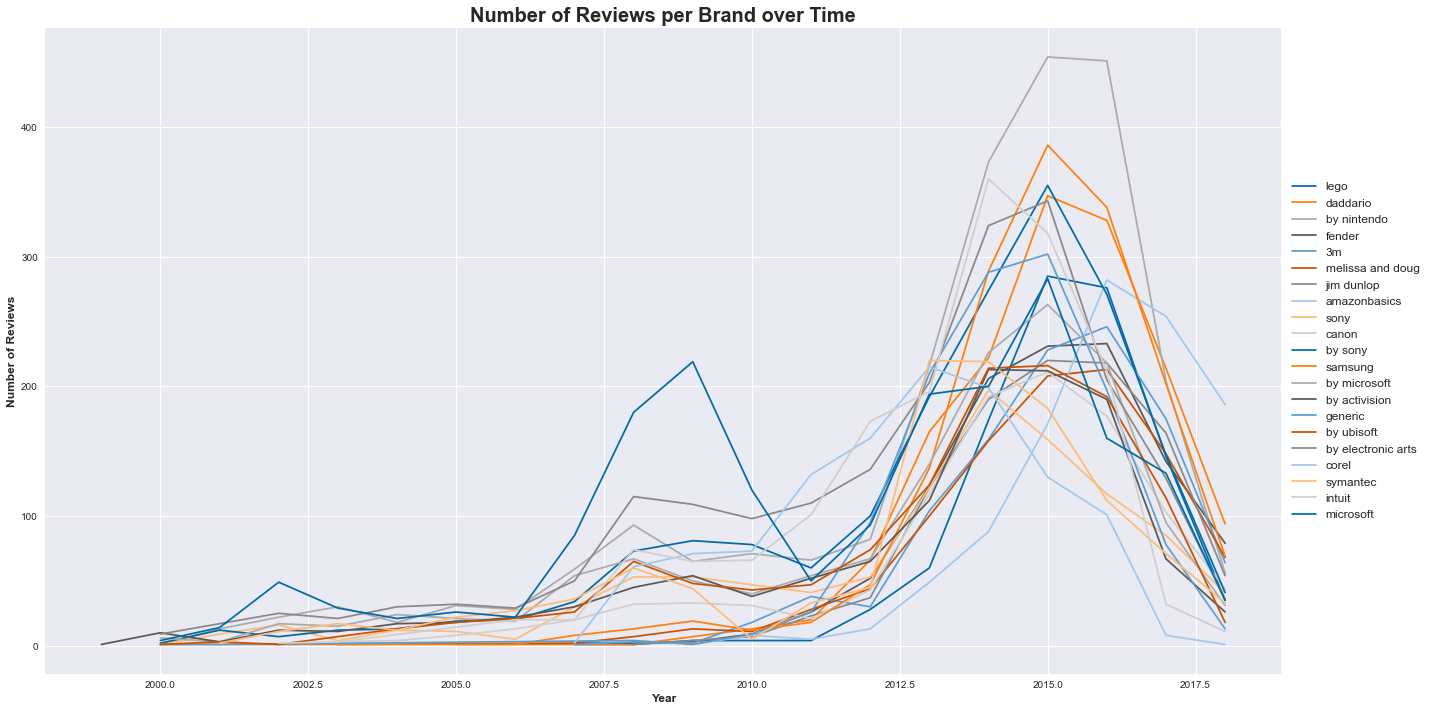

In [394]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(brand):
    plt.plot(brand_year_count[brand_year_count.brand==id].reviewYear, brand_year_count[brand_year_count.brand==id].count_rev, label=id)
    last_count = brand_year_count[brand_year_count.brand==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Brand over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [395]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(brand):
    fig.add_trace(go.Scatter(x=brand_year_count[brand_year_count.brand==id].reviewYear,
                             y=brand_year_count[brand_year_count.brand==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = brand_year_count[brand_year_count.brand==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Brand over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc10_1_5_'></a>[Average Rating per Product over Time](#toc0_)

In [396]:
# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['brand'].isin(brand)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
brand_year_avg_rating = filtered_data.groupby(['brand', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
brand_year_avg_rating.avg_rating = np.round(brand_year_avg_rating.avg_rating, 3)
display(brand_year_avg_rating.head(5))


brand  reviewYear  avg_rating
0    3m        2007       5.000
1    3m        2008       4.000
2    3m        2009       5.000
3    3m        2010       4.278
4    3m        2011       4.553

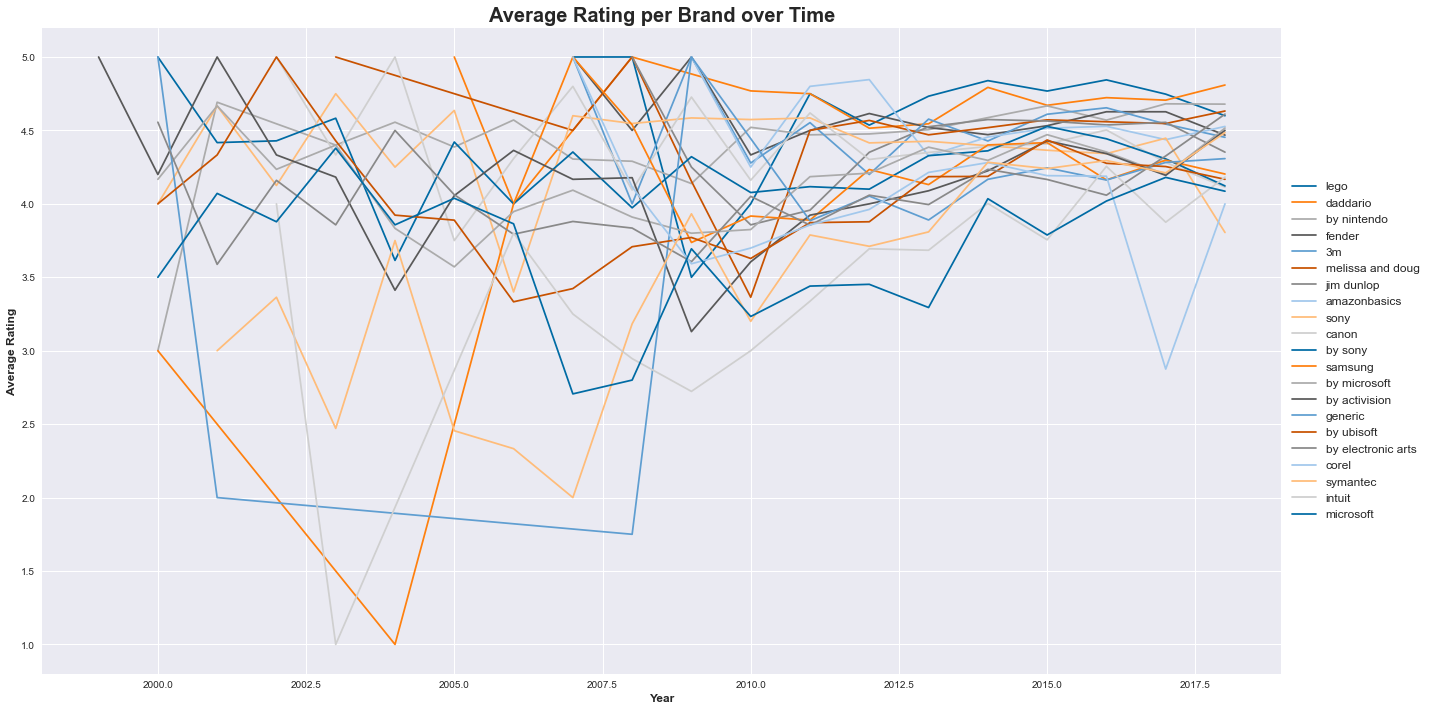

In [397]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(brand):
    plt.plot(brand_year_avg_rating[brand_year_avg_rating.brand==id].reviewYear, brand_year_avg_rating[brand_year_avg_rating.brand==id].avg_rating, label=id)
    last_count = brand_year_avg_rating[brand_year_avg_rating.brand==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Brand over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [398]:
fig = go.Figure()

for i, id in enumerate(brand):
    fig.add_trace(go.Scatter(x=brand_year_avg_rating[brand_year_avg_rating.brand==id].reviewYear,
                             y=brand_year_avg_rating[brand_year_avg_rating.brand==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = brand_year_avg_rating[brand_year_avg_rating.brand==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Brand over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
# <a id='toc11_'></a>[Sentiment Analysis](#toc0_)



***
## <a id='toc11_1_'></a>[Sentiment per Review](#toc0_)

In [399]:
data_sentiments = data[['reviewerID', 'reviewTime', 'asin', 'brand', 'reviewText','category_x', 'overall', 'sentiments_vader_revText', 'sentiments_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText', 'review_word_count']]

# ensure a review has more than 10 words
data_sentiments = data_sentiments[data_sentiments.review_word_count > 10]

### <a id='toc11_1_1_'></a>[Most Positive Reviews](#toc0_)

In [400]:
# BING, AFINN & TextBlob (top 10 most positive reviews)
data_senti_bing = data_sentiments[['reviewText', 'sentiment_score_bing_revText']].sort_values(by='sentiment_score_bing_revText', ascending=False).head(10)
data_senti_afinn = data_sentiments[['reviewText', 'sentiment_score_afinn_revText']].sort_values(by='sentiment_score_afinn_revText', ascending=False).head(10)
data_senti_textblob = data_sentiments[['reviewText', 'sentiments_textblob_revText']].sort_values(by='sentiments_textblob_revText', ascending=False).head(10)

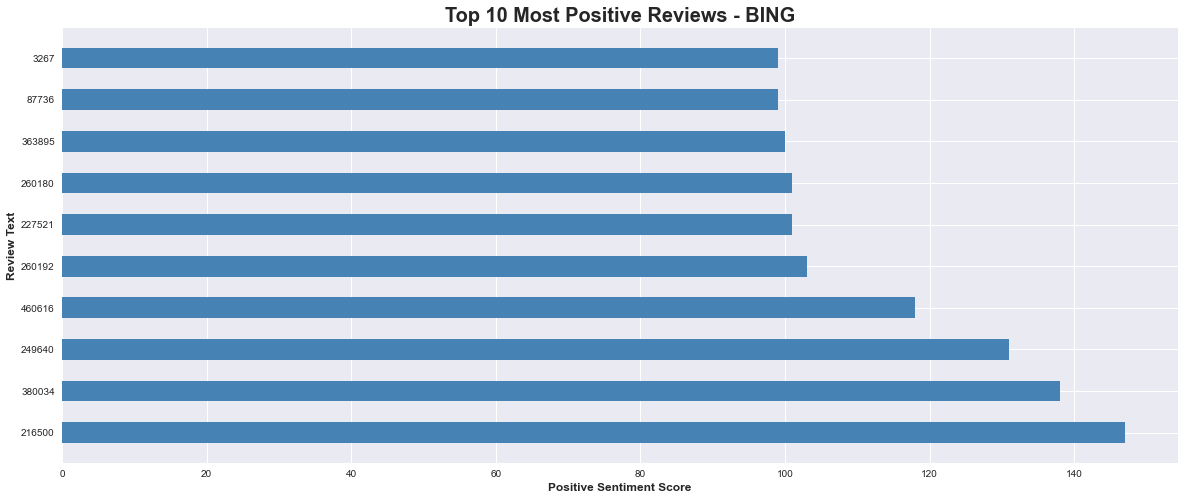

In [401]:
# BING (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_bing.index.astype(str), width=data_senti_bing['sentiment_score_bing_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - BING', fontsize=20, fontweight='bold')
plt.show()


In [402]:
# see these reviews
display(data_senti_bing.sort_values(by='sentiment_score_bing_revText', ascending=True))

reviewText  \
87736   that the late erich kunzel and sacd were made ...   
3267    the goodbye girl 1977  2016 bluray thank you n...   
363895  this game is a jrpg in line with ar series ar ...   
227521  fuzzy wuzzys summary highly recommended with w...   
260180  fuzzy wuzzys summary highly recommended with w...   
260192  fuzzy wuzzys summary highly recommended with w...   
460616  warning this is a long complicated review if y...   
249640  i and the rest of carrie underwoods fans waite...   
380034   72215 update  since i got a chance to review ...   
216500  it seems these days we gamers get inundated wi...   

        sentiment_score_bing_revText  
87736                             99  
3267                              99  
363895                           100  
227521                           101  
260180                           101  
260192                           103  
460616                           118  
249640                           131  
380034                           138  
216500                           147

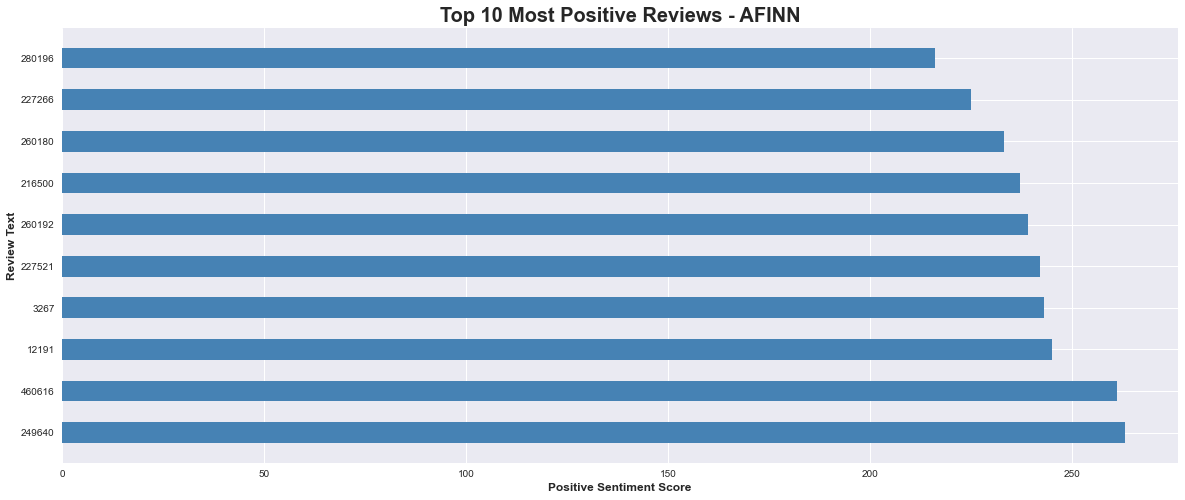

In [403]:
# AFINN (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_afinn.index.astype(str), width=data_senti_afinn['sentiment_score_afinn_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - AFINN', fontsize=20, fontweight='bold')
plt.show()


In [404]:
# see these reviews
display(data_senti_afinn.sort_values(by='sentiment_score_afinn_revText', ascending=True))

reviewText  \
280196  great great great great great great great grea...   
227266  fuzzy wuzzys summary highly recommended with w...   
260180  fuzzy wuzzys summary highly recommended with w...   
216500  it seems these days we gamers get inundated wi...   
260192  fuzzy wuzzys summary highly recommended with w...   
227521  fuzzy wuzzys summary highly recommended with w...   
3267    the goodbye girl 1977  2016 bluray thank you n...   
12191   britney was definitely at her best when she fi...   
460616  warning this is a long complicated review if y...   
249640  i and the rest of carrie underwoods fans waite...   

        sentiment_score_afinn_revText  
280196                            216  
227266                            225  
260180                            233  
216500                            237  
260192                            239  
227521                            242  
3267                              243  
12191                             245  
460616                            261  
249640                            263

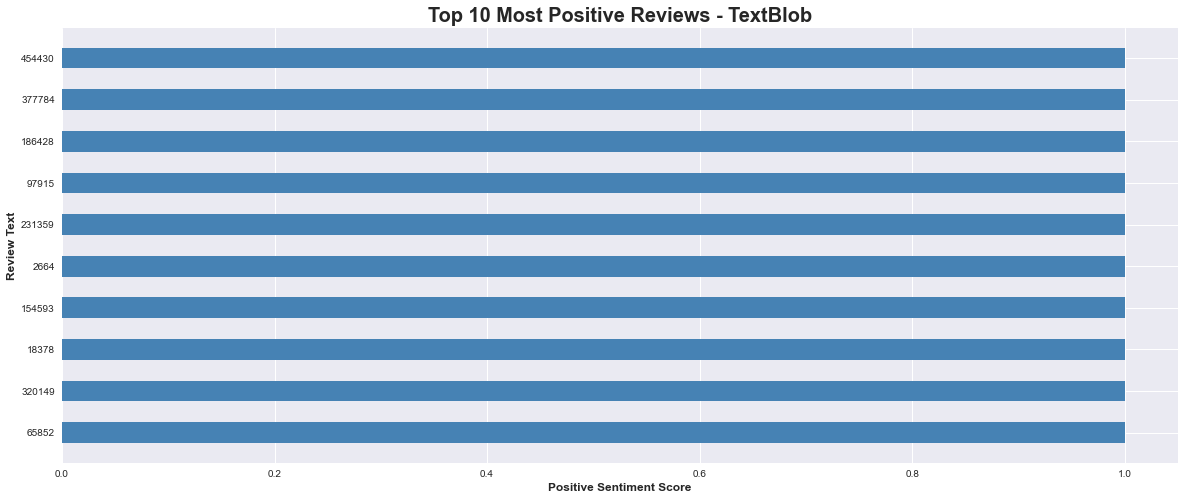

In [405]:
# TextBlob (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_textblob.index.astype(str), width=data_senti_textblob['sentiments_textblob_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - TextBlob', fontsize=20, fontweight='bold')
plt.show()


In [406]:
# see these reviews
display(data_senti_textblob.sort_values(by='sentiments_textblob_revText', ascending=True))

reviewText  \
65852   the magnetic poetry kit was shipped on time it...   
320149  i use these for making jewelry they worked per...   
18378   this is an excellent article and has worked we...   
154593  ecs are never made this well if you buy them a...   
2664    the score is one that has haunted me since chi...   
231359  the best and safest dog chews to purchase for ...   
97915   hoppes is the best you can find this stuff at ...   
186428  this is one of the best time saver gadgets i h...   
377784  awesome i removed the power boards and out bat...   
454430  perfect cant wait to use this filament perfect...   

        sentiments_textblob_revText  
65852                           1.0  
320149                          1.0  
18378                           1.0  
154593                          1.0  
2664                            1.0  
231359                          1.0  
97915                           1.0  
186428                          1.0  
377784                          1.0  
454430                          1.0

### <a id='toc11_1_2_'></a>[Most Negative Reviews](#toc0_)

In [407]:
# BING, AFINN & TextBlob (top 10 most positive reviews)
data_senti_bing = data_sentiments[['reviewText', 'sentiment_score_bing_revText']].sort_values(by='sentiment_score_bing_revText', ascending=True).head(10)
data_senti_afinn = data_sentiments[['reviewText', 'sentiment_score_afinn_revText']].sort_values(by='sentiment_score_afinn_revText', ascending=True).head(10)
data_senti_textblob = data_sentiments[['reviewText', 'sentiments_textblob_revText']].sort_values(by='sentiments_textblob_revText', ascending=True).head(10)

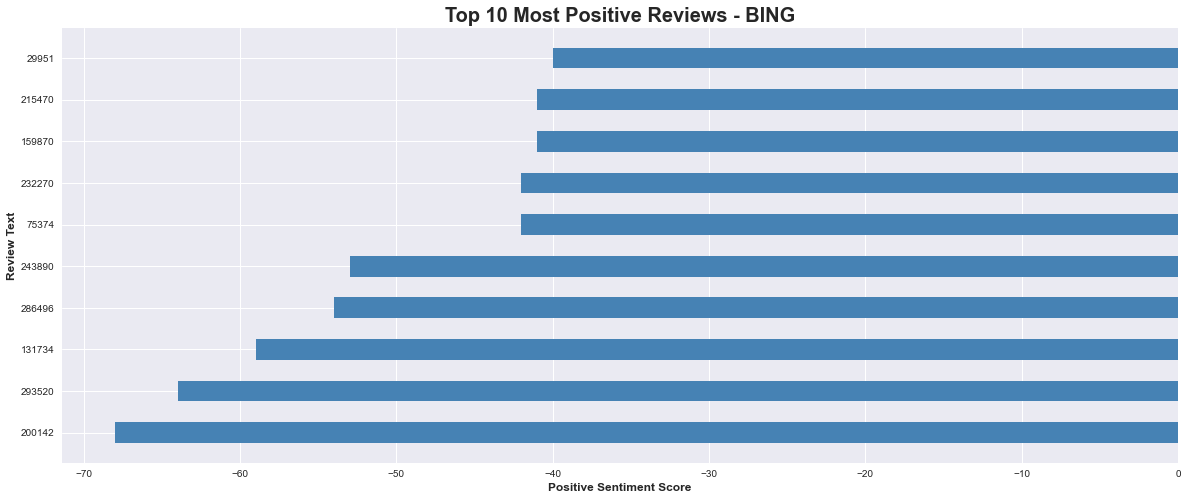

In [408]:
# BING (top 10 most negative reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_bing.index.astype(str), width=data_senti_bing['sentiment_score_bing_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - BING', fontsize=20, fontweight='bold')
plt.show()


In [409]:
display(data_senti_bing.sort_values(by='sentiment_score_bing_revText', ascending=False))


reviewText  \
29951   what makes this film so remarkable is the trut...   
159870  this is a quintessentially american story that...   
215470  after all the problems that infinity ward was ...   
75374   the hotly anticipated sonic the hedgehog game ...   
232270  the worst nintendo console ive ever owned and ...   
243890  starts poor  never really finds it stride i ha...   
286496  shoah the biblical world translates to calamit...   
131734  its hard discussing homecoming it is a game th...   
293520  may have mild spoilers i have now spent the pa...   
200142  after finishing the game i can say that while ...   

        sentiment_score_bing_revText  
29951                            -40  
159870                           -41  
215470                           -41  
75374                            -42  
232270                           -42  
243890                           -53  
286496                           -54  
131734                           -59  
293520                           -64  
200142                           -68

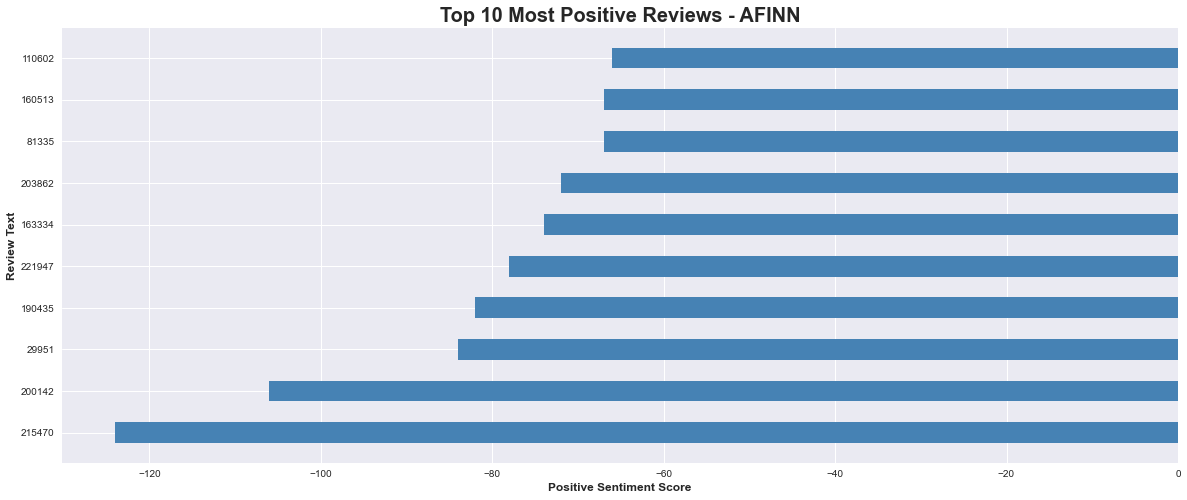

In [410]:
# AFINN (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_afinn.index.astype(str), width=data_senti_afinn['sentiment_score_afinn_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - AFINN', fontsize=20, fontweight='bold')
plt.show()


In [411]:
# see these reviews
display(data_senti_afinn.sort_values(by='sentiment_score_afinn_revText', ascending=False))

reviewText  \
110602  many survival horror fans have gotten jaded th...   
81335   bullet witch is bad atari and cavias thirdpers...   
160513  heres another indie with lofty aspirations as ...   
203862  i bought sucker punch because i only read the ...   
163334  this game is very much fun for me i always wan...   
221947  after reading so many positive reviews of this...   
190435   this review may contain spoilers  i was disap...   
29951   what makes this film so remarkable is the trut...   
200142  after finishing the game i can say that while ...   
215470  after all the problems that infinity ward was ...   

        sentiment_score_afinn_revText  
110602                            -66  
81335                             -67  
160513                            -67  
203862                            -72  
163334                            -74  
221947                            -78  
190435                            -82  
29951                             -84  
200142                           -106  
215470                           -124

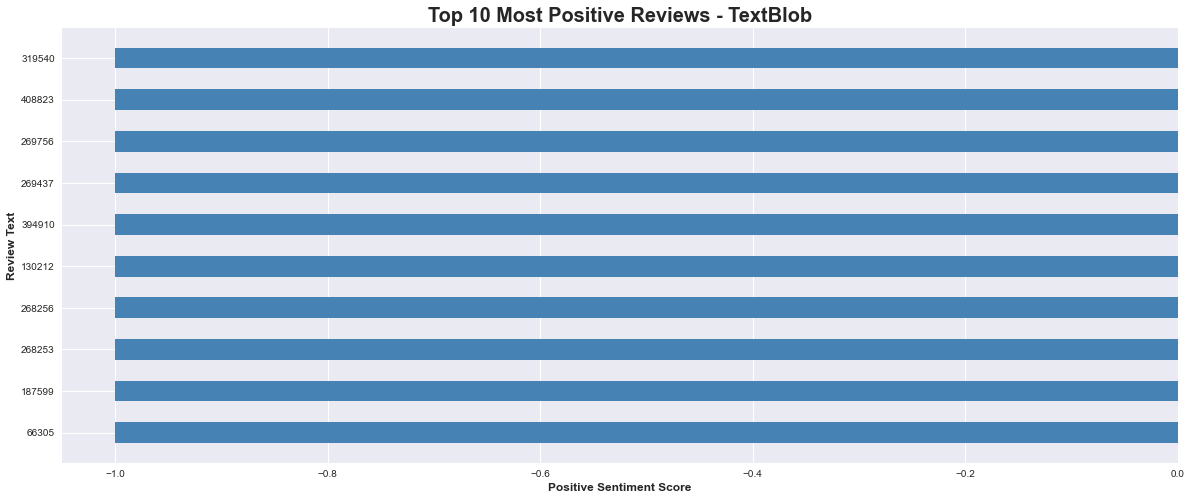

In [412]:
# TextBlob (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_textblob.index.astype(str), width=data_senti_textblob['sentiments_textblob_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - TextBlob', fontsize=20, fontweight='bold')
plt.show()

In [413]:
# see these reviews
display(data_senti_textblob.sort_values(by='sentiments_textblob_revText', ascending=False))

reviewText  \
66305   one of the worst movies i have ever seen its a...   
187599  the stamp a glorified eyelash curler doesnt wo...   
268253  i thought these were selfsealing but they are ...   
268256  if you like stevan seagal and the one man army...   
130212  terrible taste of alcohol i dont recommenddont...   
394910  bought for use in my 2000 ural to get rid of t...   
269437  did not like this flavor taste awful in tea or...   
269756  the odor is terrible the dog hates it and runs...   
408823  returning item speakers are horrible all sound...   
319540  yuck i thought this product tasted really nast...   

        sentiments_textblob_revText  
66305                          -1.0  
187599                         -1.0  
268253                         -1.0  
268256                         -1.0  
130212                         -1.0  
394910                         -1.0  
269437                         -1.0  
269756                         -1.0  
408823                         -1.0  
319540                         -1.0

### <a id='toc11_1_3_'></a>[Most Positive Reviewers](#toc0_)

In [414]:
# Number reviews and sentiment per customer
cust_data = data_sentiments.groupby(['reviewerID']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})
cust_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
cust_data = np.round(cust_data, 2)
cust_data = cust_data[cust_data.count_rev > 10]

# Number reviews and sentiment per product
prod_data = data_sentiments.groupby(['asin']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})
prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
prod_data = np.round(prod_data, 2)
prod_data = prod_data[prod_data.count_rev > 10]



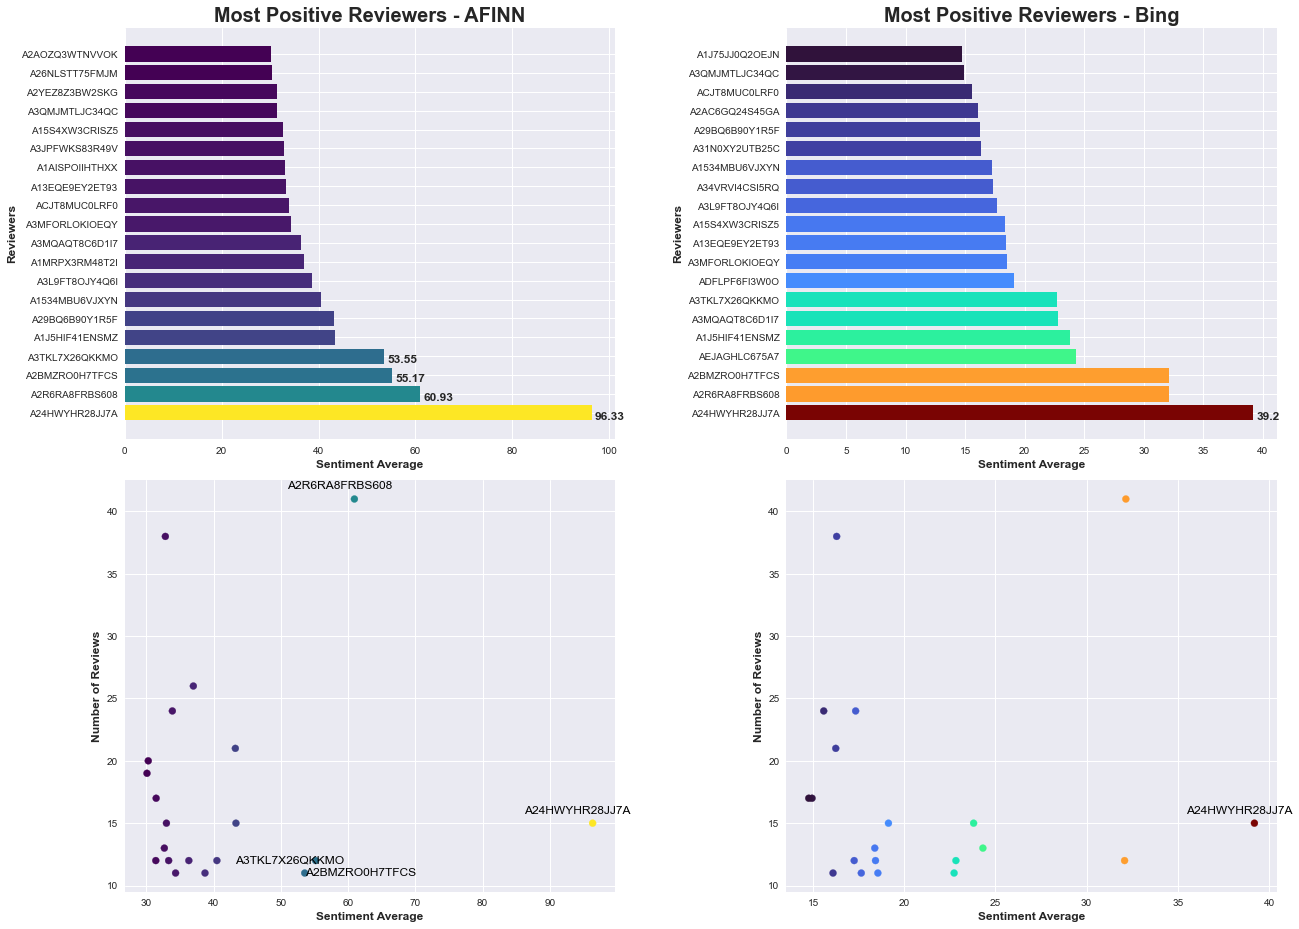

In [415]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))

# Most Positive - AFINN
cust_data1 = cust_data.sort_values(['mean_sent_afinn'], ascending=False)
cust_data1 = cust_data1.head(20)
sent_min = cust_data1.mean_sent_afinn.min() 
sent_max = cust_data1.mean_sent_afinn.max()
sent_norm = (cust_data1.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.viridis(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_afinn, color=colors_afinn)
plt.title("Most Positive Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 50:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data1.mean_sent_afinn, cust_data1.count_rev, c=colors_afinn, cmap='viridis')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_afinn[i] > 50:
        if id == "A2BMZRO0H7TFCS":
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Positive - BING
cust_data1 = cust_data.sort_values(['mean_sent_bing'], ascending=False).head(20)
sent_min = cust_data1.mean_sent_bing.min()
sent_max = cust_data1.mean_sent_bing.max()
sent_norm = (cust_data1.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.turbo(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_bing, color=colors_bing)
plt.title("Most Positive Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 35:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data1.mean_sent_bing, cust_data1.count_rev, c=colors_bing, cmap='turbo')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_bing[i] > 35:
        if (id == "A2BMZRO0H7TFCS") or (id == "A2VW4FYZILSXF2"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "A1N40I9TO33VDU"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


### <a id='toc11_1_4_'></a>[Most Negative Reviewers](#toc0_)

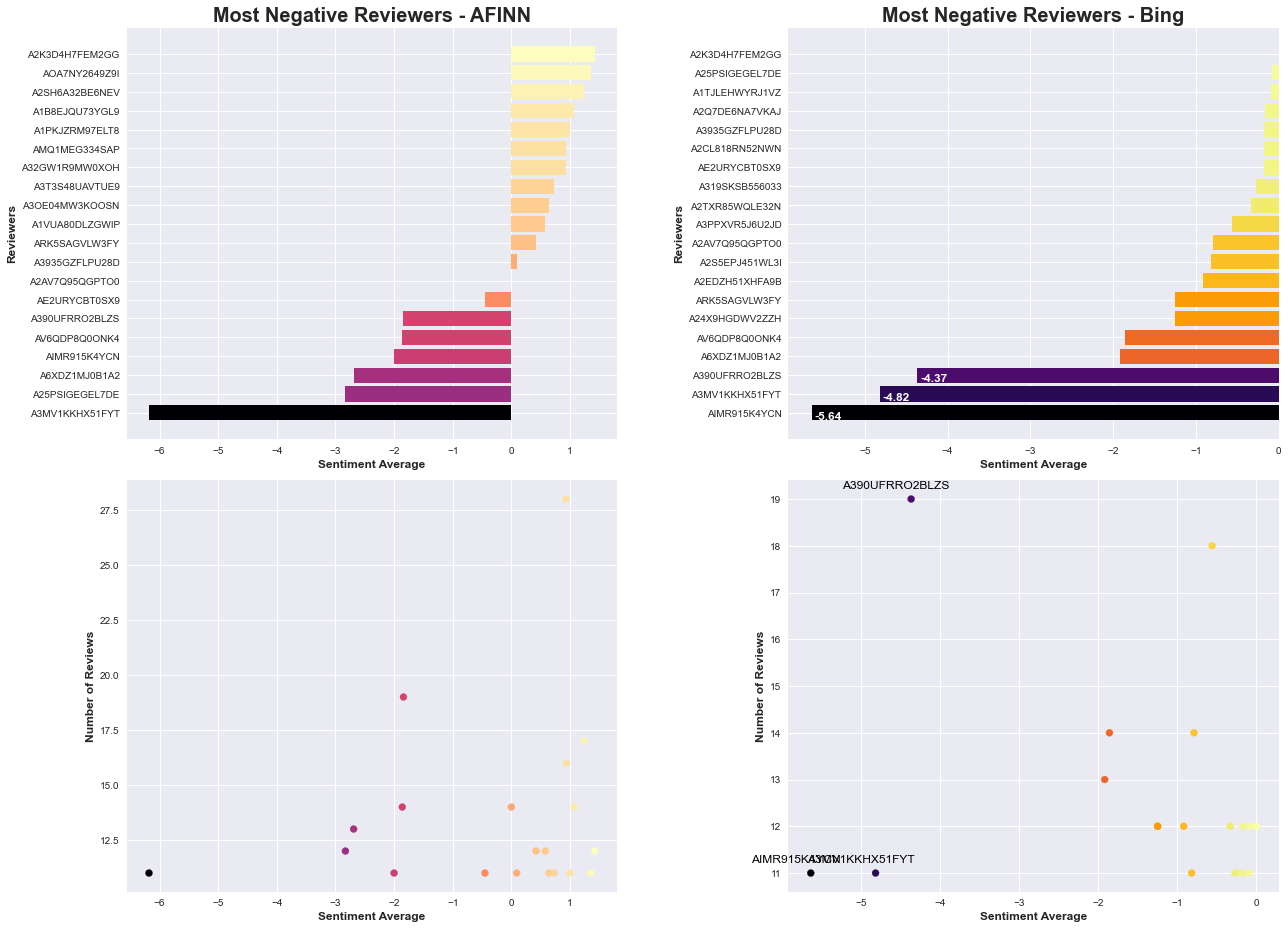

In [416]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))


# Most Negative - AFINN
cust_data2 = cust_data.sort_values(['mean_sent_afinn'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_afinn.min() 
sent_max = cust_data2.mean_sent_afinn.max()
sent_norm = (cust_data2.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.magma(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_afinn, color=colors_afinn)
plt.title("Most Negative Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -8:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data2.mean_sent_afinn, cust_data2.count_rev, c=colors_afinn, cmap='magma')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_afinn[i] < -8:
        if (id == "A3AHJVBTUQL67") or (id == "A1RDZP8TF1THTO") :
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "ABUD8RGA6AAC6"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(0,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Negative - BING
cust_data2 = cust_data.sort_values(['mean_sent_bing'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_bing.min()
sent_max = cust_data2.mean_sent_bing.max()
sent_norm = (cust_data2.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.inferno(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_bing, color=colors_bing)
plt.title("Most Negative Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -2:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data2.mean_sent_bing, cust_data2.count_rev, c=colors_bing, cmap='inferno')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_bing[i] < -2:
        if (id == "AXNBI9L5LHH6X") or (id == "A1L66FRXSW9MWZ"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


### <a id='toc11_1_5_'></a>[NRC Emotion Lexicon Analysis](#toc0_)

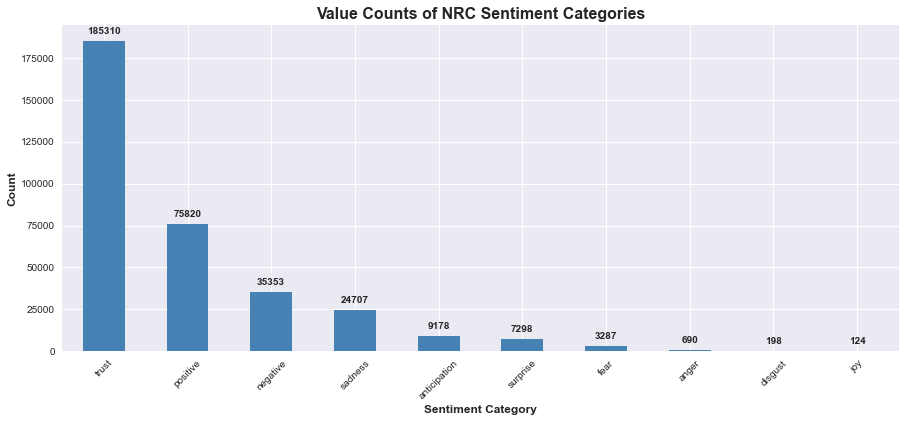

In [417]:
# Calculate value counts of each sentiment category
sentiment_nrc_counts = data_sentiments['sentiment_score_nrc_revText'].value_counts()

# Create a bar chart
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 6))
sentiment_nrc_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Sentiment Category', fontsize=12, fontweight='semibold')
plt.ylabel('Count', fontsize=12, fontweight='semibold')
plt.title('Value Counts of NRC Sentiment Categories', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Annotate the bars with their values
for i, count in enumerate(sentiment_nrc_counts):
    plt.annotate(f'{count}', xy=(i, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='semibold')

plt.show()

## <a id='toc11_2_'></a>[VADER Lexicon Analysis](#toc0_)

In [418]:
# Convert the string representation of the dictionary to a dictionary
import ast
data_sentiments['sentiments_vader_revText'] = data_sentiments['sentiments_vader_revText'].apply(ast.literal_eval)

# Extract the 'pos', 'neg' and 'neu' values from the dictionary and create a new column 'pos_values', 'neg_values' and 'neu_values'
data_sentiments['pos_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('pos', 0))
data_sentiments['neg_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('neg', 0))
data_sentiments['neu_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('neu', 0))

### <a id='toc11_2_1_'></a>[Reviews](#toc0_)

In [419]:
data_sentiments.columns

Index(['reviewerID', 'reviewTime', 'asin', 'brand', 'reviewText', 'category_x',
       'overall', 'sentiments_vader_revText', 'sentiments_textblob_revText',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_revText',
       'sentiment_score_nrc_revText', 'review_word_count', 'pos_values_vader',
       'neg_values_vader', 'neu_values_vader'],
      dtype='object')

In [420]:
# Sort the DataFrabme by 'pos_values' column in descending order for top 5 positive reviews with more than 5 words
display(data_sentiments[['reviewerID', 'reviewText', 'pos_values_vader']].sort_values(by='pos_values_vader', ascending=False).head(5))
display(data_sentiments[['reviewerID', 'reviewText', 'neg_values_vader']].sort_values(by='neg_values_vader', ascending=False).head(5))
display(data_sentiments[['reviewerID', 'reviewText', 'neu_values_vader']].sort_values(by='neu_values_vader', ascending=False).head(5))

reviewerID                                         reviewText  \
280196  A29WDUZS8D5M4K  great great great great great great great grea...   
118363  A3051L5FESDPGI  great wonderful fantastic love it great wonder...   
102436  A3VZJOWJUE5RWT  super good laughs great story line great chara...   
75758   A14PVAMKQAFMZ1  i love playing as a super hero fun game play a...   
402251  A1XOE1LSY5XOIV  super cute christian romance novel i really en...   

        pos_values_vader  
280196             1.000  
118363             0.940  
102436             0.886  
75758              0.863  
402251             0.848

reviewerID                                         reviewText  \
406265  A3TV5O9MK9SZJR    no no no no no came already broken and all bent   
50642    A19NXEG2NLM74  some reviewers stated that sound was somehow d...   
314832  A1JGIC2BC031Y1  it will kill i turned it loose on some nasty c...   
245959  A2L442C9HLGT1A  stupid movie bad acting bad story line bad plo...   
495616  A2KKYVIWCCE1Q4  awful movie nothing like the first one crap an...   

        neg_values_vader  
406265             0.738  
50642              0.663  
314832             0.651  
245959             0.644  
495616             0.588

reviewerID                                         reviewText  \
106757  A2PMZN99H159NT  i have several of these in different color dif...   
92543   A1SQ9XFVBJMIR2  i used it on a camcorder and it is still worki...   
123452  A18VMWC835PMQJ  i have a white version of this shirt  i used t...   
92522   A3V6QZ90WLWJKL  installed on my toyota tundra 2004 double cab ...   
469902  A2Q5CO3U7F2B52  i have been eating the full sized bars for sev...   

        neu_values_vader  
106757               1.0  
92543                1.0  
123452               1.0  
92522                1.0  
469902               1.0

### <a id='toc11_2_2_'></a>[Products](#toc0_)

In [421]:
# Number reviews and average ratings per product
prod_data = data_sentiments.groupby(['asin']).agg({"pos_values_vader": ["count", "mean"], "neg_values_vader": ["mean"], "neu_values_vader": ["mean"]})
prod_data.columns = ['count_rev', 'mean_rat_pos', 'mean_rat_neg', 'mean_rat_neu']
prod_data['mean_rat_pos'] = prod_data['mean_rat_pos'].round(2)
prod_data['mean_rat_neg'] = prod_data['mean_rat_neg'].round(2)
prod_data['mean_rat_neu'] = prod_data['mean_rat_neu'].round(2)
display(prod_data.sort_values(by='count_rev', ascending=False).head(10))

# only products with more than 100 reviews
prod_data = prod_data[prod_data.count_rev > 20]

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
asin                                                           
B0012Y0ZG2        553          0.26          0.03          0.71
B000URXP6E        531          0.26          0.03          0.71
B00006L9LC        303          0.25          0.04          0.72
B001OHV1H4        303          0.25          0.04          0.72
B0009RF9DW        251          0.27          0.03          0.70
B000FI4S1E        251          0.27          0.03          0.70
B0013BKDO8        201          0.16          0.04          0.80
B000EORV8Q        195          0.17          0.03          0.80
B000050ZRE        193          0.17          0.03          0.80
B0001FS9NE        193          0.17          0.03          0.80

In [422]:
# most positive products
display(prod_data.sort_values(by='mean_rat_pos', ascending=False).head(5))

# most negative products
display(prod_data.sort_values(by='mean_rat_neg', ascending=False).head(5))

# most neutral products
display(prod_data.sort_values(by='mean_rat_neu', ascending=False).head(5))


count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
asin                                                           
B0091JL3OI         23          0.41          0.01          0.58
B00JDQJZWG         25          0.37          0.02          0.61
B004Q7CK9M         31          0.34          0.03          0.62
B0013FRRMK         33          0.31          0.04          0.65
B000X3TPHS         46          0.31          0.02          0.67

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
asin                                                           
B000X1PE16         23          0.16          0.15          0.69
B0010SEVWO         21          0.25          0.13          0.62
B000X1TC0U         21          0.18          0.12          0.70
B00AF6B22E         22          0.16          0.11          0.73
B000ZK9QCS         33          0.26          0.11          0.63

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
asin                                                           
B008414ZYY         22          0.11          0.04          0.85
0763855553         33          0.11          0.05          0.84
B00MYXTCIM         25          0.11          0.05          0.84
B000WR2F2M         22          0.11          0.04          0.84
B000XHE0Q0         21          0.12          0.04          0.84

### <a id='toc11_2_3_'></a>[ Categories](#toc0_)

In [423]:
# Number reviews and average ratings per product
cat_data = data_sentiments.groupby(['category_x']).agg({"pos_values_vader": ["count", "mean"], "neg_values_vader": ["mean"], "neu_values_vader": ["mean"]})
cat_data.columns = ['count_rev', 'mean_rat_pos', 'mean_rat_neg', 'mean_rat_neu']
cat_data['mean_rat_pos'] = cat_data['mean_rat_pos'].round(2)
cat_data['mean_rat_neg'] = cat_data['mean_rat_neg'].round(2)
cat_data['mean_rat_neu'] = cat_data['mean_rat_neu'].round(2)
display(cat_data.sort_values(by='count_rev', ascending=False).head(10))

# only categories with more than 1000 reviews
cat_data = cat_data[cat_data.count_rev > 1000]

count_rev  mean_rat_pos  mean_rat_neg  \
category_x                                                          
kindle store                    22748          0.22          0.05   
pet supplies                    18894          0.19          0.05   
video games                     18728          0.20          0.07   
electronics                     18429          0.17          0.05   
cds and vinyl                   17927          0.20          0.05   
home and kitchen                17759          0.21          0.04   
musical instruments             17648          0.20          0.04   
tools and home improvement      17015          0.18          0.05   
sports and outdoors             17005          0.19          0.05   
cell phones                     16818          0.20          0.05   

                            mean_rat_neu  
category_x                                
kindle store                        0.72  
pet supplies                        0.76  
video games                         0.73  
electronics                         0.78  
cds and vinyl                       0.75  
home and kitchen                    0.75  
musical instruments                 0.76  
tools and home improvement          0.77  
sports and outdoors                 0.76  
cell phones                         0.75

In [424]:
# most positive products
display(cat_data.sort_values(by='mean_rat_pos', ascending=False).head(5))

# most negative products
display(cat_data.sort_values(by='mean_rat_neg', ascending=False).head(5))

# most neutral products
display(cat_data.sort_values(by='mean_rat_neu', ascending=False).head(5))

count_rev  mean_rat_pos  mean_rat_neg  \
category_x                                                          
beauty                           2767          0.24          0.03   
clothing shoes and jewelry       7269          0.24          0.04   
toys and games                  16649          0.23          0.04   
prime pantry                    10937          0.23          0.04   
arts crafts                     14438          0.22          0.04   

                            mean_rat_neu  
category_x                                
beauty                              0.72  
clothing shoes and jewelry          0.73  
toys and games                      0.73  
prime pantry                        0.73  
arts crafts                         0.74

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
category_x                                                                
video games                18728          0.20          0.07          0.73
movies and tv              14682          0.21          0.07          0.72
patio lawn and garden      16409          0.18          0.05          0.77
cds and vinyl              17927          0.20          0.05          0.75
cell phones                16818          0.20          0.05          0.75

count_rev  mean_rat_pos  mean_rat_neg  \
category_x                                                          
software                        10428          0.14          0.05   
electronics                     18429          0.17          0.05   
industrial                      15064          0.17          0.04   
office products                 16038          0.19          0.04   
tools and home improvement      17015          0.18          0.05   

                            mean_rat_neu  
category_x                                
software                            0.81  
electronics                         0.78  
industrial                          0.78  
office products                     0.77  
tools and home improvement          0.77

### <a id='toc11_2_4_'></a>[Brands](#toc0_)

In [425]:
# Number reviews and average ratings per product
brand_data = data_sentiments.groupby(['brand']).agg({"pos_values_vader": ["count", "mean"], "neg_values_vader": ["mean"], "neu_values_vader": ["mean"]})
brand_data.columns = ['count_rev', 'mean_rat_pos', 'mean_rat_neg', 'mean_rat_neu']
brand_data['mean_rat_pos'] = brand_data['mean_rat_pos'].round(2)
brand_data['mean_rat_neg'] = brand_data['mean_rat_neg'].round(2)
brand_data['mean_rat_neu'] = brand_data['mean_rat_neu'].round(2)
display(brand_data.sort_values(by='count_rev', ascending=False).head(10))

# only categories with more than 30 reviews
brand_data = brand_data[brand_data.count_rev > 30]

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
brand                                                                  
microsoft                1689          0.14          0.06          0.80
by nintendo              1650          0.23          0.05          0.72
by electronic arts       1529          0.20          0.08          0.73
intuit                   1377          0.13          0.06          0.82
by sony                  1323          0.21          0.07          0.73
corel                    1133          0.15          0.03          0.81
by microsoft             1077          0.19          0.06          0.74
symantec                  982          0.15          0.06          0.80
samsung                   955          0.17          0.05          0.77
daddario                  939          0.21          0.04          0.75

In [426]:
# most positive products
display(brand_data.sort_values(by='mean_rat_pos', ascending=False).head(5))

# most negative products
display(brand_data.sort_values(by='mean_rat_neg', ascending=False).head(5))

# most neutral products
display(brand_data.sort_values(by='mean_rat_neu', ascending=False).head(5))


count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
brand                                                            
gain                 41          0.35          0.02          0.63
panera bread         32          0.35          0.02          0.62
amazon              347          0.34          0.02          0.63
nobleworks           39          0.32          0.03          0.65
inkadinkado          38          0.32          0.02          0.65

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
brand                                                         
ortho             85          0.14          0.12          0.75
victor            81          0.14          0.11          0.75
roundup           44          0.12          0.11          0.76
v4ink             36          0.16          0.11          0.73
accuquilt         45          0.19          0.11          0.70

count_rev  mean_rat_pos  mean_rat_neg  mean_rat_neu
brand                                                                    
oxford                       40          0.12          0.03          0.86
portta                       36          0.11          0.04          0.85
peach pit press              31          0.13          0.02          0.85
motion pro                   35          0.12          0.04          0.84
topics entertainment         47          0.14          0.03          0.84

## <a id='toc11_3_'></a>[Distribution of Sentiment Scores](#toc0_)

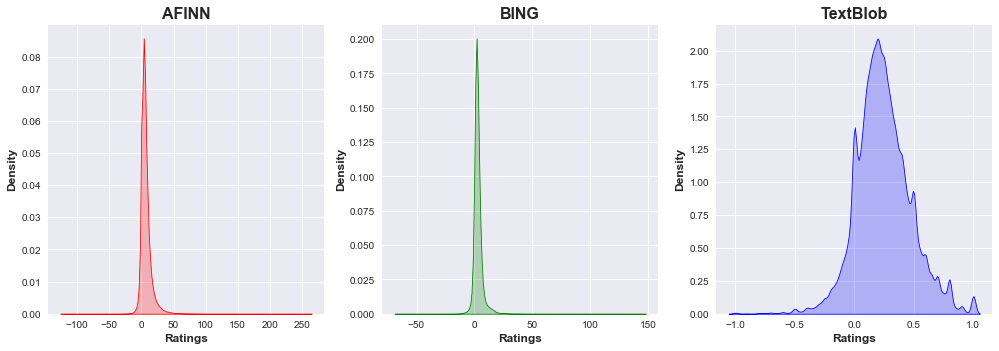

In [427]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
sns.set_context("paper", font_scale=1.1)

sns.kdeplot(data_sentiments['sentiment_score_afinn_revText'], color="Red", shade=True, ax=axes[0])
axes[0].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[0].set_title('AFINN', fontsize=16, fontweight='bold')

sns.kdeplot(data_sentiments['sentiment_score_bing_revText'], color="Green", shade=True, ax=axes[1])
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[1].set_title('BING', fontsize=16, fontweight='bold')

sns.kdeplot(data_sentiments['sentiments_textblob_revText'], color="Blue", shade=True, ax=axes[2])
axes[2].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[2].set_title('TextBlob', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


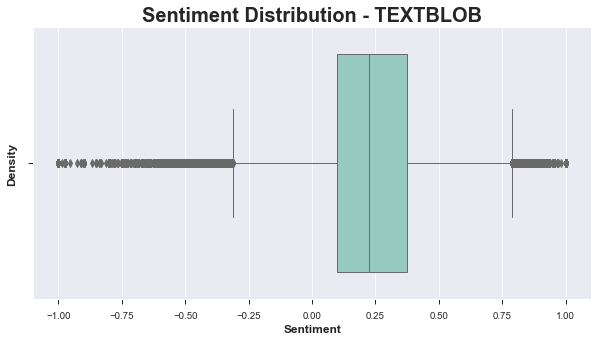

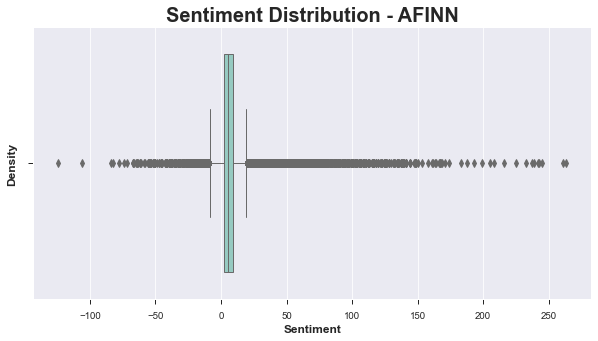

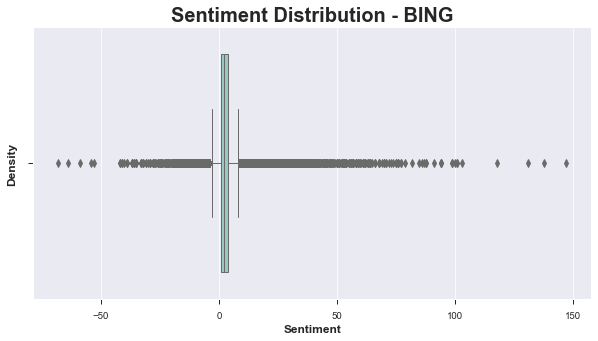

In [428]:
# plot a boxplot using seaborn for TEXTBLOB, AFNINN and BING
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiments_textblob_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - TEXTBLOB", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiment_score_afinn_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiment_score_bing_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - BING", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()


In [429]:
print("Sentiment Distribution - AFINN")
display(data_sentiments['sentiment_score_afinn_revText'].describe())

print("\nSentiment Distribution - BING")
display(data_sentiments['sentiment_score_bing_revText'].describe())

print("\nSentiment Distribution - TEXTBLOB")
display(data_sentiments['sentiments_textblob_revText'].describe())

Sentiment Distribution - AFINN


count    341965.000000
mean          6.403214
std           8.933830
min        -124.000000
25%           2.000000
50%           5.000000
75%           9.000000
max         263.000000
Name: sentiment_score_afinn_revText, dtype: float64


Sentiment Distribution - BING


count    341965.000000
mean          2.795491
std           4.313337
min         -68.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         147.000000
Name: sentiment_score_bing_revText, dtype: float64


Sentiment Distribution - TEXTBLOB


count    341965.000000
mean          0.242223
std           0.231448
min          -1.000000
25%           0.100000
50%           0.225000
75%           0.375000
max           1.000000
Name: sentiments_textblob_revText, dtype: float64

***
## <a id='toc11_4_'></a>[Sentiment per Product](#toc0_)

In [430]:
# Number reviews and sentiment per product - more than 20 reviews per product
prod_data = data_sentiments.groupby(['asin']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})

prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
prod_data = prod_data[prod_data['count_rev'] > 20]
prod_data = np.round(prod_data, 2)

### <a id='toc11_4_1_'></a>[Most Positive Products](#toc0_)

In [431]:
# most postive products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(prod_data.sort_values(['mean_sent_bing'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B009066NOC         21            27.90           13.48                0.23
B00LX4BYV6         21            26.71           15.14                0.14
B000VJRU44         36            26.67            8.72                0.22
B002DHGMK0         22            25.32           14.32                0.18
B00IVFDZBC         21            23.00           12.05                0.21


Most Positive Products by Average Sentiment Score - BING
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B00LX4BYV6         21            26.71           15.14                0.14
B002DHGMK0         22            25.32           14.32                0.18
B009066NOC         21            27.90           13.48    

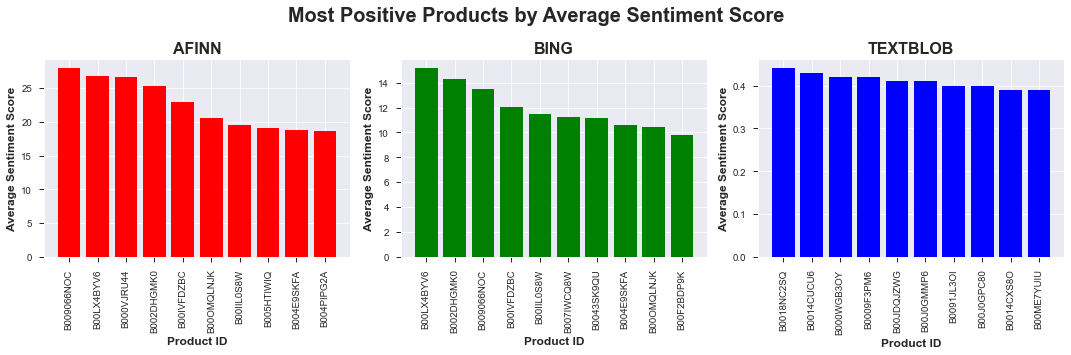

In [432]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(10).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(prod_data.sort_values(['mean_sent_bing'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_bing'], ascending=False).head(10).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(10).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Positive Products by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


### <a id='toc11_4_2_'></a>[Most Negative Products](#toc0_)



In [433]:
# most negative products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(prod_data.sort_values(['mean_sent_bing'], ascending=True).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B000X1PE16         23            -0.57           -1.13                0.04
B0010SEVWO         21            -0.10            3.05                0.27
B00NG7JVSQ         45             0.78            0.67                0.15
B0010O748Q         32             1.03            1.62                0.16
B000W9JN4S         22             1.09           -0.55                0.11


Most Positive Products by Average Sentiment Score - BING
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B000X1PE16         23            -0.57           -1.13                0.04
B000W9JN4S         22             1.09           -0.55                0.11
B00004R9VV         31             1.52           -0.06    

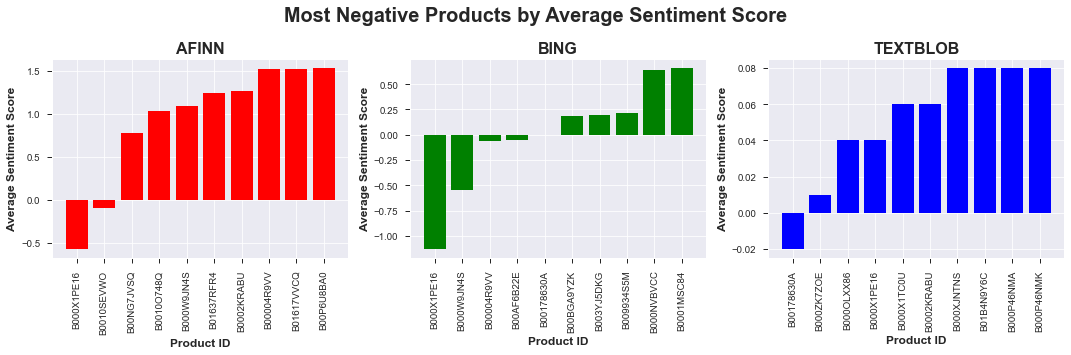

In [434]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(10).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(prod_data.sort_values(['mean_sent_bing'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_bing'], ascending=True).head(10).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(10).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Negative Products by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

***
## <a id='toc11_5_'></a>[Sentiment per Category](#toc0_)

In [435]:
data_sentiments.columns

Index(['reviewerID', 'reviewTime', 'asin', 'brand', 'reviewText', 'category_x',
       'overall', 'sentiments_vader_revText', 'sentiments_textblob_revText',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_revText',
       'sentiment_score_nrc_revText', 'review_word_count', 'pos_values_vader',
       'neg_values_vader', 'neu_values_vader'],
      dtype='object')

In [436]:
#  get average sentiment score per product category (more than 20 reviews per category)
cat_data = data_sentiments.groupby(['category_x']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})

cat_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
cat_data = cat_data[cat_data['count_rev'] > 20]
cat_data = np.round(cat_data, 2)

### <a id='toc11_5_1_'></a>[Most Positive Categories](#toc0_)

In [437]:
# most postive products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(cat_data.sort_values(['mean_sent_bing'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
                        count_rev  mean_sent_afinn  mean_sent_bing  \
category_x                                                           
digital music                 262            13.18            5.54   
cds and vinyl               17927            13.12            5.63   
video games                 18728             9.48            3.33   
software                    10428             8.80            4.62   
magazine subscriptions       1433             8.60            3.25   

                        mean_sent_textblob  
category_x                                  
digital music                         0.25  
cds and vinyl                         0.27  
video games                           0.14  
software                              0.18  
magazine subscriptions                0.28  


Most Positive Products by Average Sentiment Score - BING
                        count_rev  mean_sent_afinn  mean_sent_bing  \
categor

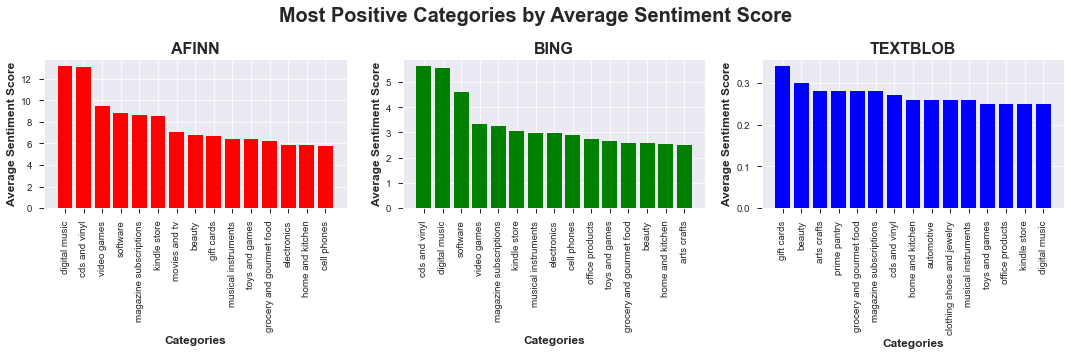

In [438]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(cat_data.sort_values(['mean_sent_bing'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_bing'], ascending=False).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Positive Categories by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


### <a id='toc11_5_2_'></a>[Most Negative Categories](#toc0_)



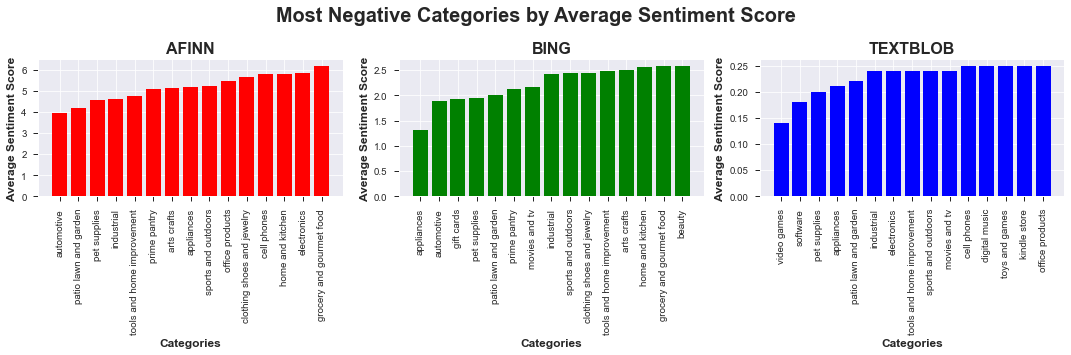

In [439]:
# bar plot for the most negative products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cat_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(cat_data.sort_values(['mean_sent_bing'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_bing'], ascending=True).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(cat_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Negative Categories by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

***
## <a id='toc11_6_'></a>[Sentiment per Brand](#toc0_)

In [440]:
#  get average sentiment score per product category (more than 20 reviews per category)
brand_data = data_sentiments.groupby(['brand']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})

brand_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
brand_data = brand_data[brand_data['count_rev'] > 20]
brand_data = np.round(brand_data, 2)

### <a id='toc11_6_1_'></a>[Most Positive Brands](#toc0_)

In [441]:
# most postive products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(brand_data.sort_values(['mean_sent_afinn'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(brand_data.sort_values(['mean_sent_bing'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(brand_data.sort_values(['mean_sent_textblob'], ascending=False).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
                                 count_rev  mean_sent_afinn  mean_sent_bing  \
brand                                                                         
christina aguilera                      24            32.92           13.42   
visit amazons lauren layne page         25            25.16            8.60   
britney spears                          32            24.25            9.38   
mariah carey                            44            23.95           10.32   
yes                                     51            23.22           10.10   

                                 mean_sent_textblob  
brand                                                
christina aguilera                             0.28  
visit amazons lauren layne page                0.25  
britney spears                                 0.18  
mariah carey                                   0.27  
yes                                            0.25  


Most Pos

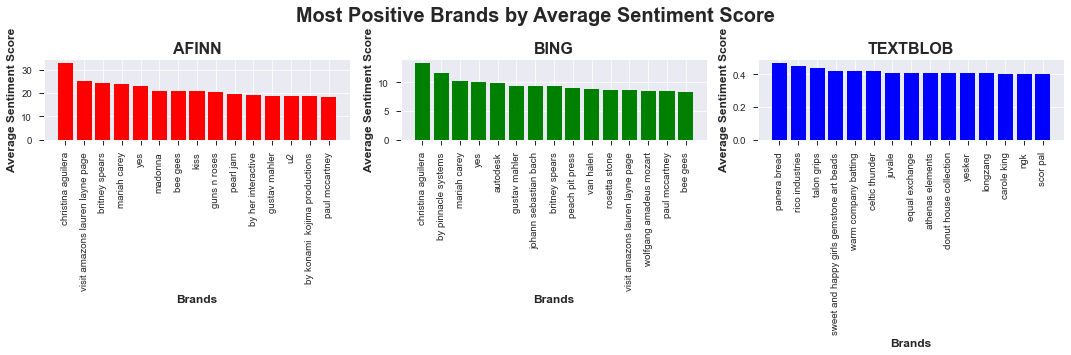

In [442]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(brand_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).index, brand_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(brand_data.sort_values(['mean_sent_bing'], ascending=False).head(15).index, brand_data.sort_values(['mean_sent_bing'], ascending=False).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(brand_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).index, brand_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Positive Brands by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


### <a id='toc11_6_2_'></a>[Most Negative Brands](#toc0_)



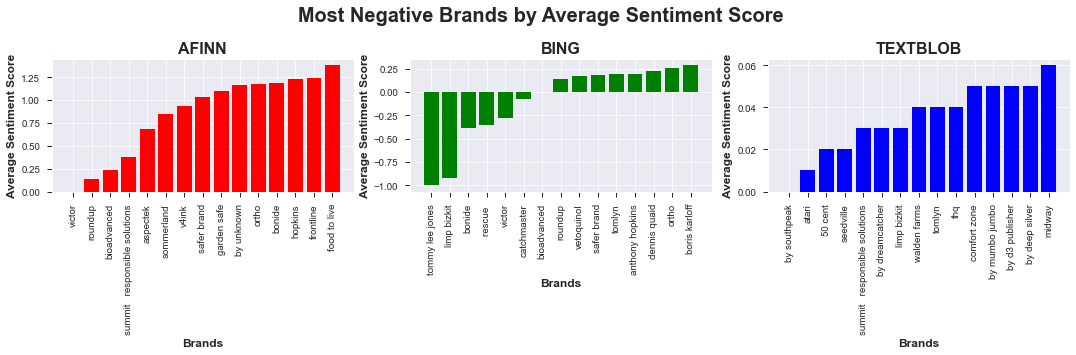

In [443]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(brand_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).index, brand_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(brand_data.sort_values(['mean_sent_bing'], ascending=True).head(15).index, brand_data.sort_values(['mean_sent_bing'], ascending=True).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(brand_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).index, brand_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Brands", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Negative Brands by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

## <a id='toc11_7_'></a>[Comparing Lexicons](#toc0_)

Correlation with rating scores: If you have numerical rating scores associated with the review texts, you can compute the correlation between the sentiment predicted by each sentiment lexicon and the rating scores. A higher correlation suggests that the sentiment lexicon captures the underlying sentiment expressed in the ratings.


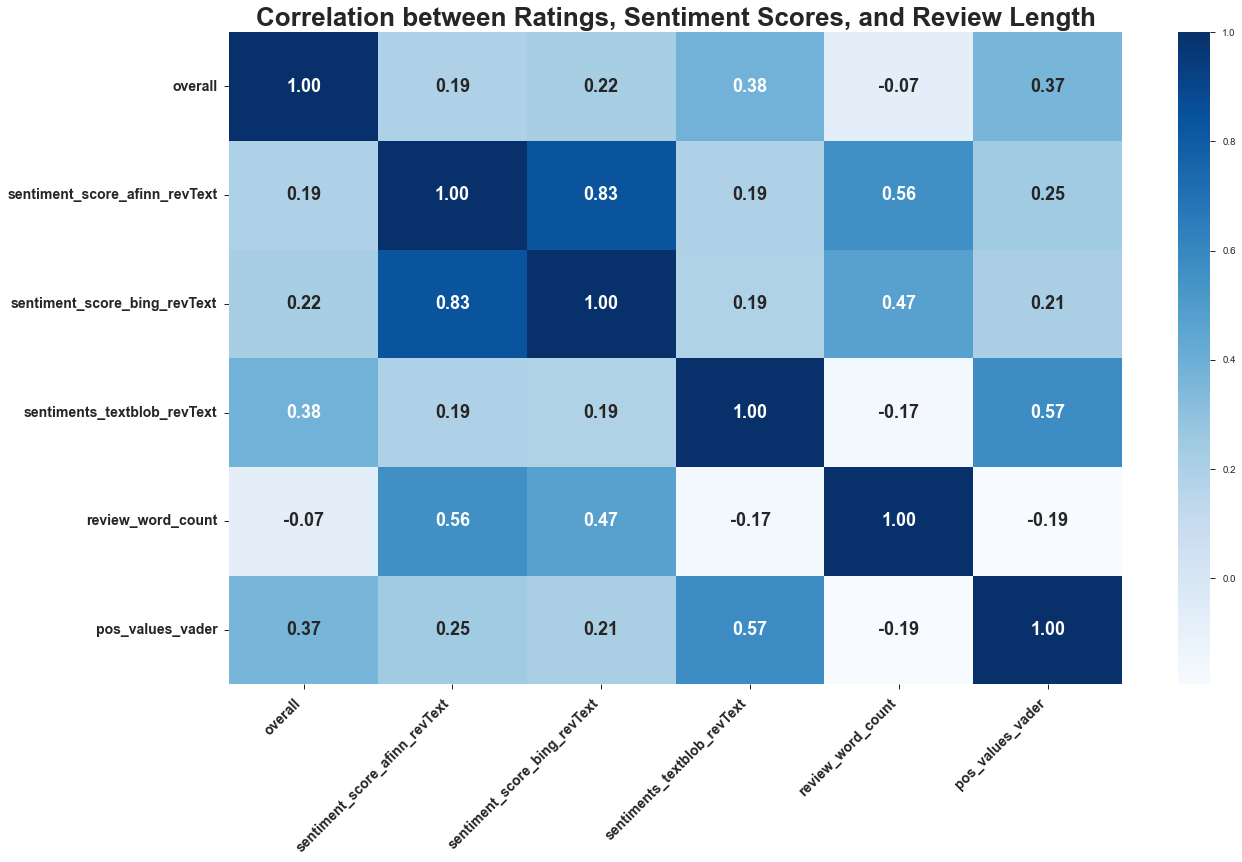

In [444]:
# get correlation between Ratings, Sentiment Scores and Review Length
corr = data_sentiments[['overall', 'sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiments_textblob_revText', 'review_word_count', 'pos_values_vader']].corr()

# heat map for correlation between Ratings, Sentiment Scores and Review Length
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 18, "fontweight": "bold"})
plt.title("Correlation between Ratings, Sentiment Scores, and Review Length", fontsize=26, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.show()



# <a id='toc12_'></a>[Data Summaries](#toc0_)

- overview of dataset
    - number of rows (reviews)
    - number of unique products
    - number of unique reviewers
    - number of unique categories
    - date range of reviews
    - number of reviews per year
    - number of reviews per month
    - number of columns
    - key columns to be used
    - average number of reviews per reviewer
    - average number of reviews per product

- distribution of ratings
- summary of ratings data

- Sentiment used: Bing, NRC, VADER, TextBlob, AFINN

In [445]:
print("Number of rows in the dataset:", data.shape[0])
print("\nNumber of columns in the dataset:", data.shape[1])
print("\nNumber unique products:", data.asin.nunique())
print("\nNumber categories:", data.category_x.nunique())
print("\nNumber of Reviewers:", data.reviewerID.nunique())
print("\nFirst Review Date:", data.reviewTime.min(), "\nLast Review Date:", data.reviewTime.max())
print("\nAverage number of reviews per product:", round(data.groupby('asin')['reviewerID'].count().mean(), 2))
print("\nAverage number of reviews per reviewer:", round(data.groupby('reviewerID')['asin'].count().mean(), 2))


Number of rows in the dataset: 496219

Number of columns in the dataset: 23

Number unique products: 251615

Number categories: 26

Number of Reviewers: 339625

First Review Date: 1998-04-28 00:00:00 
Last Review Date: 2018-10-03 00:00:00

Average number of reviews per product: 1.97

Average number of reviews per reviewer: 1.46


In [446]:
# key data
data[['reviewerID', 'reviewTime', 'asin','reviewText', 'category_x', 'overall', 'subjectivities_textblob_revText']].head(15)

reviewerID reviewTime        asin  \
0     A3WJELEV137U 2015-06-05  0001526863   
1   A3OJM6TXMK3J53 2015-12-05  0005164885   
2   A14YR7QK3ASFFW 2001-04-24  0005465079   
3   A1VE933MFXTG18 2016-02-21  0307142493   
4   A3VRRAZTTVF3SH 2014-12-13  0307142493   
5   A2AXULQJ2Q88HX 2016-07-21  0310432065   
6   A2B2M5YQZPBOA3 2015-11-07  0310806607   
7   A2DAMI6AVZYTP9 2016-02-06  0310821800   
8   A21PKYWMOJZ4VV 2013-01-08  0310821800   
9    AH03Q5EW4MIO0 2013-08-29  0310821800   
10  A38E3EMVTA2930 2015-12-29  0310823706   
11  A3V7D0LH8L7BG0 2010-11-15  0321700945   
12  A10Y058K7B96C6 2010-12-06  0321700945   
13  A23E9QQHJLNGUI 2010-10-07  0321700945   
14  A1GQRGB8FGSLIZ 2011-05-15  0321700945   

                                           reviewText       category_x  \
0   product worked as advertised and am pleased wi...    movies and tv   
1                      nice to hear this cd beautiful    cds and vinyl   
2   that one song has to be one of the best in ccm...    cds and vinyl   
3   i just love these older movies they really are...    movies and tv   
4                   love this movie at christmas time    movies and tv   
5                                           wonderful  office products   
6   i purchased this for my sons boy scout book wi...  office products   
7   met my expectations the only thing i would lik...  office products   
8   love love this bible cover the ladies at churc...  office products   
9   i did not find any leather in this bible cover...  office products   
10  really nice book cover bought it for a large s...  office products   
11  i am a long time user of photoshop lightroom f...         software   
12  i am not an avid lightroom user although i hav...         software   
13  adobe approved adobe photoshop lightroom 3 lea...         software   
14  this is a greate collection of videos on the d...         software   

    overall  subjectivities_textblob_revText  
0       5.0                         1.000000  
1       5.0                         1.000000  
2       5.0                         0.435278  
3       5.0                         0.575970  
4       5.0                         0.600000  
5       5.0                         1.000000  
6       5.0                         0.407887  
7       5.0                         0.512500  
8       5.0                         0.609375  
9       1.0                         0.426190  
10      5.0                         0.788095  
11      5.0                         0.569264  
12      5.0                         0.553061  
13      5.0                         0.450000  
14      5.0                         0.424318

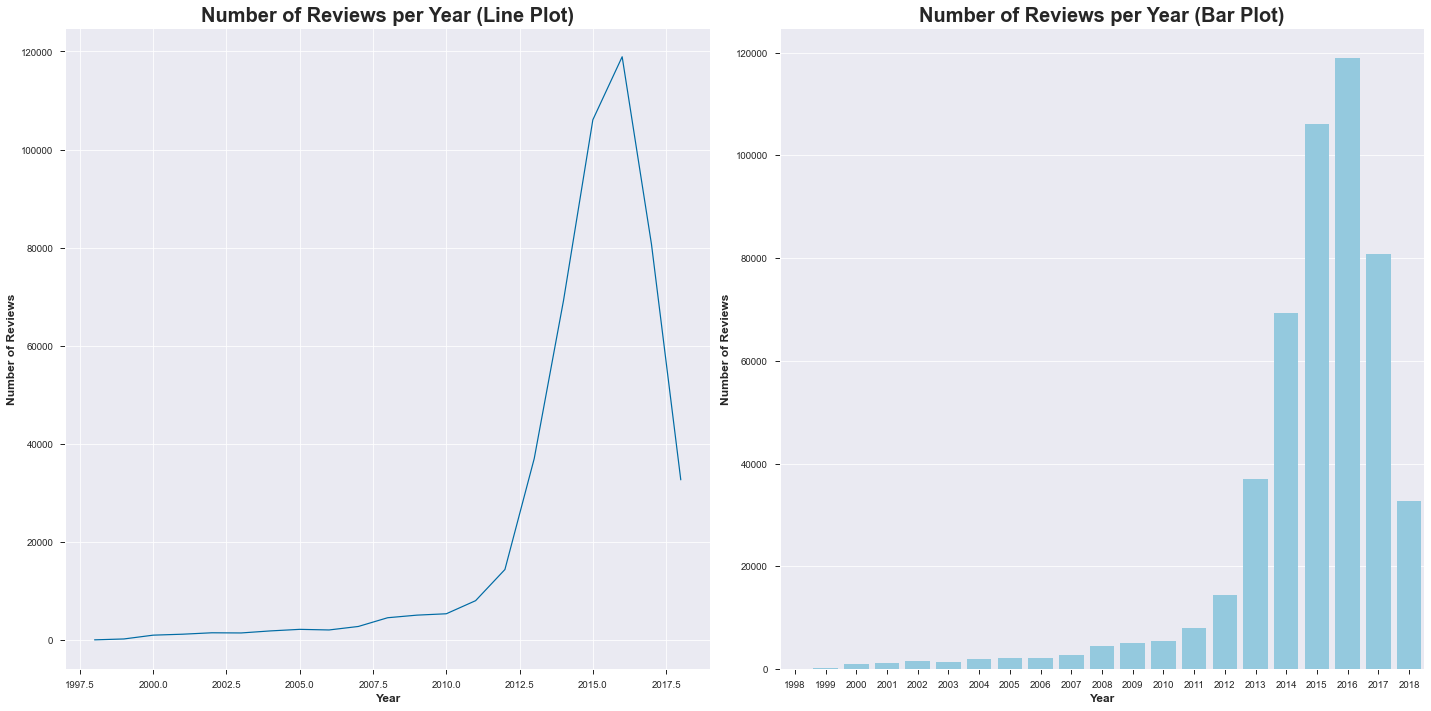

In [447]:
# Reviews Per Year
year_data = data.copy()
year_data['reviewTime'] = data['reviewTime'].dt.year
year_count = year_data.groupby(['reviewTime']).size().reset_index(name='count_rev')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Line plot
axes[0].plot(year_count.reviewTime, year_count.count_rev)
axes[0].set_xlabel('Year', fontsize=12, fontweight='semibold')
axes[0].set_ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
axes[0].set_title("Number of Reviews per Year (Line Plot)", fontsize=20, fontweight='bold')

# Bar plot
sns.barplot(x='reviewTime', y='count_rev', data=year_count, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Year', fontsize=12, fontweight='semibold')
axes[1].set_ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
axes[1].set_title("Number of Reviews per Year (Bar Plot)", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


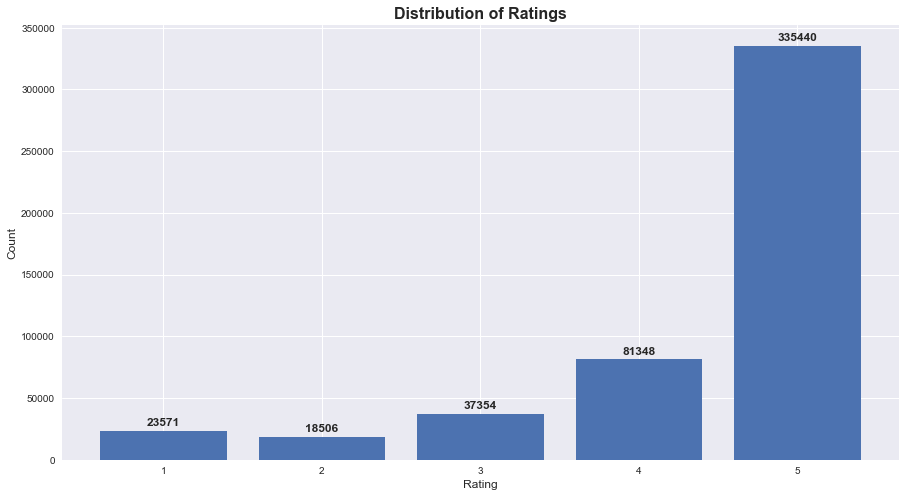

In [448]:
# Distribution of Ratings
plt.style.use('seaborn')
ratings = data['overall'].astype('category')
rating_counts = ratings.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(rating_counts.index, rating_counts.values, color='#4c72b0')
for rect in bars:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)
ax.set_title("Distribution of Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [449]:
# Number Summary of Ratings
print("Number Summary of Ratings")
display(data['overall'].describe())

Number Summary of Ratings


count    496219.000000
mean          4.383623
std           1.086642
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

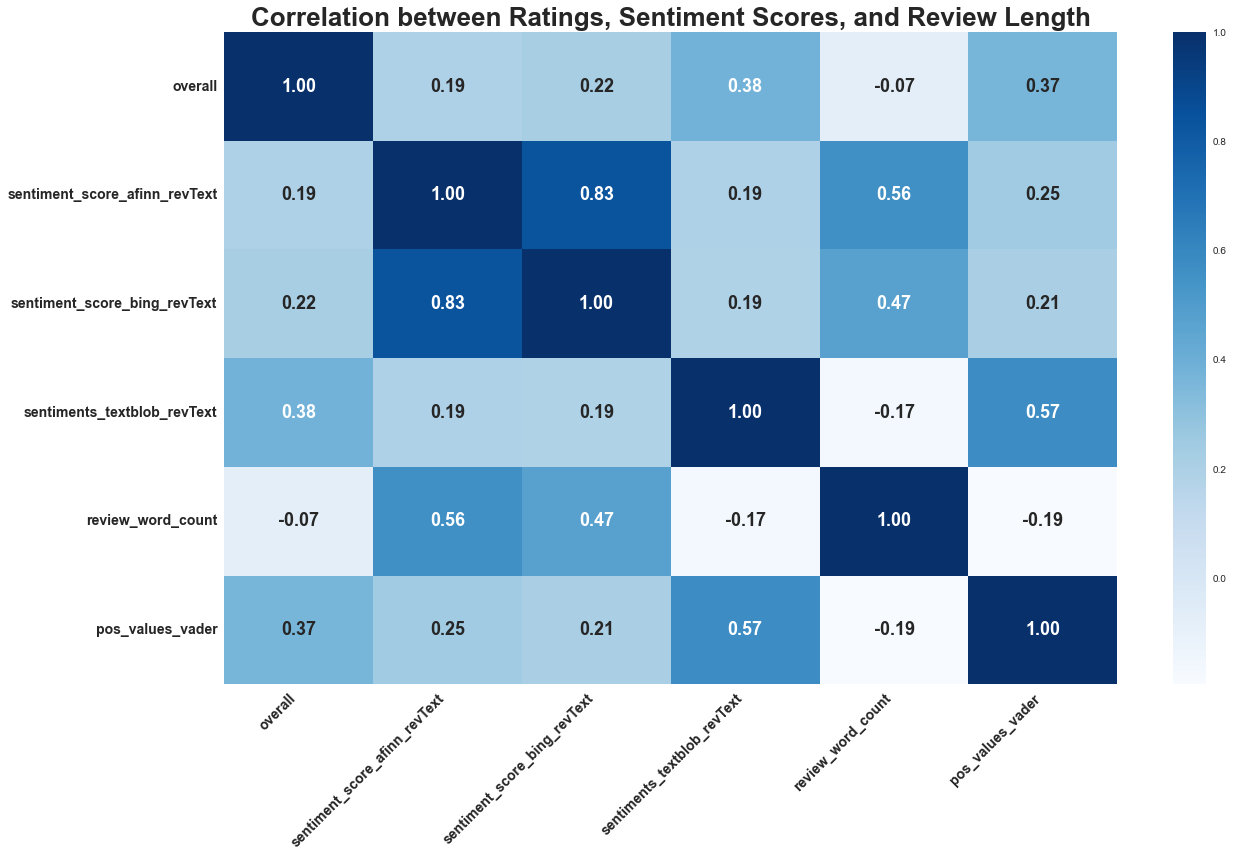

In [450]:
# Correlation Plot for Sentiments
corr = data_sentiments[['overall', 'sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiments_textblob_revText', 'review_word_count', 'pos_values_vader']].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 18, "fontweight": "bold"})
plt.title("Correlation between Ratings, Sentiment Scores, and Review Length", fontsize=26, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.show()
